In [ ]:
# basin-paper-figures.ipynb
#
# Bryan Daniels
# 2024/1/24
#
# Minimal code for producing figures in the basin control approximation paper.
#
# Taking code from cell-collective-find-isolated-attractors.ipynb
# and basin-sizes-to-control-kernel-sizes.ipynb

In [99]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from toolbox.simplePickle import load,save
from toolbox.defaultFigure import makePretty
from load_control_kernel_data import loadDataExact

# recomputing basin data from scratch uses these packages
import tqdm
#from neet.boolean import LogicNetwork,WTNetwork

#import scipy.stats

In [41]:
# color palettes from coolors.co
colors1 = {'random':'#74D3AE',
           'random dark':'#2C8C67',
           'cellcollective':'#DD9787',
           'cellcollective dark':'#AF4831',
           'other':'#678D58'
          }

# Load data

### Load data for random networks

In [42]:
dataDir = '/Users/bdaniel6/ASUDropbox/Shared/GRNs/DATA/'
dataDirRBN = dataDir+'20201215-control-kernels-rbn/'
dataDirRandom = dataDir+'20201211-control-kernels-random/'
dataDictExactRBN,dfExactRBN = loadDataExact(dataDirRBN)
dataDictExactRandom,dfExactRandom = loadDataExact(dataDirRandom)

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [43]:
# combine the two random ensembles
dfExactRandomAll = pd.concat([dfExactRBN,dfExactRandom])

### Load Iowa database control kernel data

In [100]:
iowaDataDir = '/Users/bdaniel6/ASUDropbox/Research/control-continuous/Data/240203-control-kernels/'
dataDictIowa,dfIowa = loadDataExact(iowaDataDir)

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Compute basin data for random networks (or load from file)

In [44]:
recompute = False # takes about 25 minutes to compute everything here

if recompute: 
    # compute for random weight-threshold networks
    basinDataExactRandom = {}
    for name in tqdm.tqdm(dataDictExactRandom):
        CKdata = dataDictExactRandom[name]
        weights = CKdata['net_weights']
        thresholds = CKdata['net_thresholds']
        net = WTNetwork(weights,thresholds=thresholds)
        connected_components = list(nx.connected_components(net.network_graph().to_undirected()))
        basinDataExactRandom[name] = {'basin_sizes':net.basin_sizes,
                                      'attractors':net.attractors,
                                      'connected_components':connected_components,
                                     }
    save(basinDataExactRandom,'240116_basinDataExactRandom.pkl')
else:
    basinDataExactRandom = load('240116_basinDataExactRandom.pkl')
    
if recompute:
    # compute for "RBN" random networks
    basinDataExactRBN = {}
    for name in tqdm.tqdm(dataDictExactRBN):
        CKdata = dataDictExactRBN[name]
        table = CKdata['net_table']
        net = LogicNetwork(table)
        basinDataExactRBN[name] = {'basin_sizes':net.basin_sizes,
                                   'attractors':net.attractors,
                                  }
    save(basinDataExactRBN,'240116_basinDataExactRBN.pkl')
else:
    basinDataExactRBN = load('240116_basinDataExactRBN.pkl')

### Save number of connected components for random networks

In [ ]:
# 2024/2/8 THIS NEEDS TO BE UPDATED BY RECOMPUTING CONNECTED COMPONENTS ABOVE

In [45]:
for basinDataExact in [basinDataExactRandom,basinDataExactRBN]:
    for name in basinDataExact:
        dfExactRandomAll.loc[name,'number of connected components'] = len(basinDataExact[name]['connected_components'])

In [46]:
print("There are {} disconnected random networks out of {}.".format(
    len(dfExactRandomAll[dfExactRandomAll['number of connected components']>1]),
    len(dfExactRandomAll)))

There are 36 disconnected random networks out of 375.


### Load sampled basin data for cell collective networks

In [47]:
# gather all cell collective basin data into a dictionary
datadir = '../code/'

basinDataDict = {}
for filename in glob.glob(datadir+'basin_entropy_data*.pkl'):
    data = load(filename)
    basinDataDict[data['name']] = data

### Compute basin data for cell collective networks (or load from file)

In [48]:
# compute isolated fixed points (or load from files)
recompute_all = False
recompute_unfinished = False
skip = ['Yeast_Apoptosis',]

if recompute_unfinished or recompute_all:
    for net_name in basinDataDict:
        if recompute_all or (recompute_unfinished and 'is_isolated_list' not in basinDataDict[net_name]):
            if net_name not in skip:
                print("Computing for network {}...".format(net_name))
                net = netDict[net_name]
                if 'sampled_basin_freqs' in basinDataDict[net_name]:
                    is_isolated_list = isolated_list(net,
                                                     basinDataDict[net_name]['attractors'],
                                                     basinDataDict[net_name]['sampled_basin_freqs'])
                else:
                    is_isolated_list = isolated_list(net,
                                                     basinDataDict[net_name]['attractors'])
                basinDataDict[net_name]['is_isolated_list'] = is_isolated_list
    # save basin data dictionaries
    for name in basinDataDict:
        save(basinDataDict[name],'{}basin_entropy_data_{}_with_isolated.pkl'.format(datadir,name))
else:
    # load basin data dictionaries with isolated fixed point data
    for net_name in basinDataDict:
        basinDataDict[net_name] = load('{}basin_entropy_data_{}_with_isolated.pkl'.format(datadir,net_name))

### Compute basin data for Iowa database networks (or load from file)

In [102]:
recompute_iowa = True

if recompute_iowa:
    
else:
    basinDataExactIowa = load('240208_basinDataIowa.pkl')

  0%|                                                    | 0/60 [00:00<?, ?it/s]


KeyError: 'net_table'

### Load control kernel data for cell collective networks

In [49]:
# useful code for dealing with cell collective networks from from code/cellCollective.py
def directory_name(n_name):
    """
    Returns the name of the Cell Collective directory given
    the "nice" name with spaces
    """
    return n_name.replace(' ','_').replace('.','')
    
def nice_name(dir_name):
    """
    Returns the "nice" name of the Cell Collective network
    given the directory name
    """
    nice = dir_name.replace('_',' ')
    if nice == 'Iron Acquisition And Oxidative Stress Response In Aspergillus Fumigatus':
        nice = nice+'.'
    return nice

In [50]:
control_kernel_data_file = '/Users/bdaniel6/ASUDropbox/Research/grn-survey/Writeups/control-kernel-2020/'\
    'Nature Comm final revision Aug 2021/zenodo Aug 2021/20200820_control_kernel_supplemental_info.csv'
ck_df = pd.read_csv(control_kernel_data_file).set_index('name')

# # include expected average ck size and difference from expected
# ck_df['expected mean control kernel size'] = np.log2(ck_df['number of attractors'])
# ck_df['difference from expected mean control kernel size'] = \
#     ck_df['mean control kernel size'] - ck_df['expected mean control kernel size']

print("We have exact control kernel data for {} networks.".format((1-ck_df['uses sampling method']).sum()))

We have exact control kernel data for 44 networks.


In [51]:
# compute number of isolated fixed points for each network
for net_name in basinDataDict:
    if 'is_isolated_list' in basinDataDict[net_name]:
        ck_df.loc[nice_name(net_name),'number of isolated fixed points'] = \
            np.sum(basinDataDict[net_name]['is_isolated_list'])

In [52]:
print("We have isolated fixed point data for {} networks.".format(ck_df['number of isolated fixed points'].count()))
print()
print("{} network is missing because it takes too long to run:".format(len(skip)))
for name in skip:
    print(" - {}".format(name))
print()
print("{} networks are missing because we only have sampled attractors:".format(ck_df['uses sampling method'].sum()))
for name in ck_df[ck_df['uses sampling method']].index:
    print(" - {}".format(name))

We have isolated fixed point data for 43 networks.

1 network is missing because it takes too long to run:
 - Yeast_Apoptosis

5 networks are missing because we only have sampled attractors:
 - FA BRCA Pathway
 - Lymphoid And Myeloid Cell Specification And Transdifferentiation
 - Bordetella Bronchiseptica
 - Cholesterol Regulatory Pathway
 - Pc12 Cell Differentiation


In [53]:
exactDataDir = '/Users/bdaniel6/ASUDropbox/Shared/GRNs/DATA/20200820-control-kernels/'
dataDictExact = loadDataExact(exactDataDir)[0]

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Compute control kernel size predictions

In [55]:
# define functions for estimating average control kernel size

# just log2(r)
def predict_ck_simple(basin_sizes,n):
    num_attractors = len(basin_sizes)
    return np.log2(num_attractors)

def predict_ck_all_basins(basin_sizes,n):
    return np.mean(n - np.log2(basin_sizes))

# n when basin size is <=1, log2(r) otherwise
def predict_ck_separate_isolated(basin_sizes,n):
    num_attractors = len(basin_sizes)
    num_unstable = np.sum(np.array(basin_sizes)<=1)
    return np.log2(num_attractors) + (n-np.log2(num_attractors))*num_unstable/num_attractors

def proportion_of_isolated_fixed_points(basin_sizes,n):
    return np.mean([ size == 1 for size in basin_sizes ])


# calculate the predicted mean control kernel sizes and store them in dataframes
compute_cell_collective = True
functions_to_test = [predict_ck_simple,
                     predict_ck_separate_isolated,
                     proportion_of_isolated_fixed_points,
                     predict_ck_all_basins,
                    ]
for ck_func in functions_to_test: 
    
    if compute_cell_collective:
        
        ck_df[ck_func.__name__] = np.nan*np.zeros(len(ck_df))
        for name in basinDataDict.keys():
            #basin_samples = basinDataDict[name]['sampled_basin_freqs']
            # just convert Boolean value to 2 if non-isolated and 0 if isolated
            if 'is_isolated_list' in basinDataDict[name]:
                basin_sizes = 2*(1-np.array(basinDataDict[name]['is_isolated_list']))
                n = basinDataDict[name]['network_size']
                predicted_CK = ck_func(basin_sizes,n)
                ck_df.loc[nice_name(name),ck_func.__name__] = predicted_CK
            else:
                pass
                #print("No data for {}".format(name))
    
    for name in basinDataExactRandom.keys(): 
        basin_sizes = basinDataExactRandom[name]['basin_sizes']
        n = dataDictExactRandom[name]['size']
        predicted_CK = ck_func(basin_sizes,n)
        dfExactRandomAll.loc[name,ck_func.__name__] = predicted_CK
        
    for name in basinDataExactRBN.keys():
        basin_sizes = basinDataExactRBN[name]['basin_sizes']
        n = dataDictExactRBN[name]['size']
        predicted_CK = ck_func(basin_sizes,n)
        dfExactRandomAll.loc[name,ck_func.__name__] = predicted_CK

/var/folders/2y/r9yfmnys37xd00fknrv2tgym0000gn/T/ipykernel_5705/2668504771.py:9: RuntimeWarning: divide by zero encountered in log2
  return np.mean(n - np.log2(basin_sizes))


### Gather basin sizes and control kernel sizes for individual attractors of random networks

In [56]:
relative_basin_sizes = []
relative_ck_sizes_isolated = []
relative_ck_sizes_nonisolated = []
absolute_ck_sizes = []
net_sizes = []
for dataDict,basinDataExact in zip([dataDictExactRandom,dataDictExactRBN],
                                   [basinDataExactRandom,basinDataExactRBN]):
    for name in basinDataExact:
        if 'control_kernel_sizes' in dataDict[name]:
            # sort everything by the first state of each attractor
            ckAtts = dataDict[name]['attractors']
            basinAtts = basinDataExact[name]['attractors']
            ckOrder = np.argsort([ min(a) for a in ckAtts ])
            basinOrder = np.argsort([ min(a) for a in basinAtts ])
            
            ck_sizes = np.array(dataDict[name]['control_kernel_sizes'])[ckOrder]
            net_size = dataDict[name]['size']
            basin_sizes = np.array(basinDataExact[name]['basin_sizes'])[basinOrder]
            isolated = [ basin_size==1 for basin_size in basin_sizes ]
            basinDataExact[name]['control_kernel_sizes_ordered'] = ck_sizes
            basinDataExact[name]['is_isolated_list_ordered'] = isolated

            # save control kernel sizes filtered to include only nonisolated attractors
            ck_sizes_nonisolated = [ ck_sizes[i] for i in range(len(ck_sizes)) if not isolated[i] ]
            basinDataExact[name]['control_kernel_sizes_nonisolated'] = ck_sizes_nonisolated
            dfExactRandomAll.loc[name,'mean control kernel size nonisolated'] = \
                np.mean([ ck_size for ck_size in ck_sizes_nonisolated if ck_size is not None ])
            
            # add to lists of isolated and nonisolated relative ck sizes
            relative_basin_sizes.extend( [ basin_sizes[i]/(2**net_size) for i in range(len(ck_sizes)) \
                  if (ck_sizes[i] is not None) ])
            relative_ck_sizes_isolated.extend(
                [ ck_sizes[i]/net_size for i in range(len(ck_sizes)) \
                  if isolated[i] and (ck_sizes[i] is not None) ])
            relative_ck_sizes_nonisolated.extend(
                [ ck_sizes[i]/net_size for i in range(len(ck_sizes)) \
                  if (not isolated[i]) and (ck_sizes[i] is not None) ])
            absolute_ck_sizes.extend([ ck_sizes[i] for i in range(len(ck_sizes)) \
                  if (ck_sizes[i] is not None) ])
            net_sizes.extend( [ net_size for i in range(len(ck_sizes)) \
                  if (ck_sizes[i] is not None) ])
        else:
            pass
            #print("No control kernel data for network {}.".format(name))

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Gather basin sizes and control kernel sizes for individual attractors of cell collective networks

In [57]:
relative_ck_sizes_isolated_cc = []
relative_ck_sizes_nonisolated_cc = []
for name in basinDataDict:
    ck_sizes = dataDictExact[nice_name(name)]['control_kernel_sizes']
    basinDataDict[name]['control_kernel_sizes'] = ck_sizes
    net_size = basinDataDict[name]['network_size']
    if 'is_isolated_list' in basinDataDict[name]:
        isolated = basinDataDict[name]['is_isolated_list']
        
        # save control kernel sizes filtered to include only nonisolated attractors
        ck_sizes_nonisolated = [ ck_sizes[i] for i in range(len(ck_sizes)) if not isolated[i] ]
        basinDataDict[name]['control_kernel_sizes_nonisolated'] = ck_sizes_nonisolated
        ck_df.loc[nice_name(name),'mean control kernel size nonisolated'] = \
            np.mean([ ck_size for ck_size in ck_sizes_nonisolated if ck_size is not None ])

        # add to lists of isolated and nonisolated relative ck sizes
        relative_ck_sizes_isolated_cc.extend([ ck_sizes[i]/net_size for i in range(len(ck_sizes)) if isolated[i] ])
        relative_ck_sizes_nonisolated_cc.extend(
            [ ck_sizes[i]/net_size for i in range(len(ck_sizes)) if (not isolated[i]) and (ck_sizes[i] is not None) ])        

### Output relevant data for variance calculations

In [58]:
# save data for random networks
print("Including data for {} random networks.".format(len(dfExactRandomAll)))
dfExactRandomAll['number of isolated fixed points'] = \
    dfExactRandomAll['proportion_of_isolated_fixed_points'] * dfExactRandomAll['number of attractors']
columns_to_save = ['mean control kernel size',
                   'number of attractors',
                   'size',
                   'number of isolated fixed points']
dfExactRandomAll[columns_to_save].to_csv('240123_random_ck_and_isolated_fp_data.csv')

# save data for cell collective networks
print("Including data for {} cell collective networks.".format(len(ck_df)))
ck_df[columns_to_save].to_csv('240123_cell_collective_ck_and_isolated_fp_data.csv')

Including data for 375 random networks.
Including data for 49 cell collective networks.


### 2024/2/6 compute fraction of state space that leads to uncontrollable attractors

In [63]:
# compute fraction of uncontrollable states for random networks
for basinDict,dataDict in zip([basinDataExactRandom,basinDataExactRBN],[dataDictExactRandom,dataDictExactRBN]):
    for name in dataDict:
        if 'control_kernels' in dataDict[name]:
            is_uncontrollable_list = np.array([ ck==None for ck in dataDict[name]['control_kernels'] ])
            num_uncontrollable_states = np.sum([ np.array(basinDict[name]['basin_sizes'])*is_uncontrollable_list ])
            assert(np.sum(basinDict[name]['basin_sizes']) == 2**dataDict[name]['size'])
            num_total_states = 2**dataDict[name]['size']
            dfExactRandomAll.loc[name,'fraction of uncontrollable states'] = num_uncontrollable_states/num_total_states

# compute fraction of uncontrollable attractors for random networks
num_uncontrollable = dfExactRandomAll['number of attractors'] - dfExactRandomAll['number of attractors with control kernel']
dfExactRandomAll['fraction of uncontrollable attractors'] = num_uncontrollable/dfExactRandomAll['number of attractors']

In [64]:
# compute fraction of uncontrollable states for cell collective networks
for name in dataDictExact:
    if 'sampled_basin_freqs' in basinDataDict[directory_name(name)]:
        is_uncontrollable_list = np.array([ ck==None for ck in dataDictExact[name]['control_kernels'] ])
        num_uncontrollable_states = np.sum([ np.array(basinDataDict[directory_name(name)]['sampled_basin_freqs'])*is_uncontrollable_list ])
        #assert(np.sum(basinDataExact[name]['basin_sizes']) == 2**dataDict[name]['size'])
        num_total_states = 2**dataDictExact[name]['size']
        ck_df.loc[name,'fraction of uncontrollable states'] = num_uncontrollable_states/num_total_states
    else:
        print("No basin data for {}".format(name))

No basin data for Budding Yeast Cell Cycle 2009
No basin data for Arabidopsis Thaliana Cell Cycle
No basin data for Septation Initiation Network
No basin data for Tumour Cell Invasion And Migration
No basin data for Mammalian Cell Cycle 2006
No basin data for Treatment Of Castration-Resistant Prostate Cancer
No basin data for Guard Cell Abscisic Acid Signaling
No basin data for Fanconi Anemia And Checkpoint Recovery
No basin data for Yeast Apoptosis
No basin data for T-Cell Signaling 2006


Text(0.5, 0, 'Fraction of states leading to uncontrollable cycles')

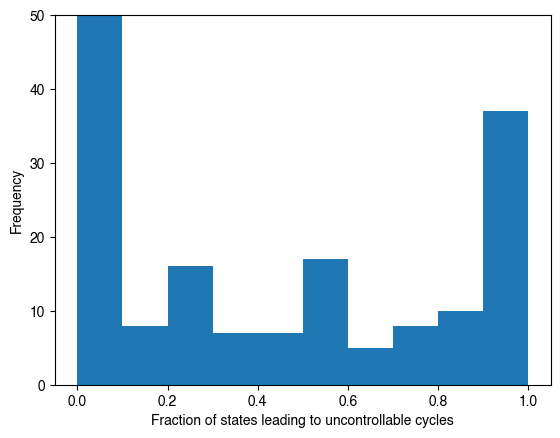

In [65]:
dfExactRandomAll['fraction of uncontrollable states'].plot.hist()
plt.axis(ymax=50)
plt.xlabel('Fraction of states leading to uncontrollable cycles')

<Axes: ylabel='Frequency'>

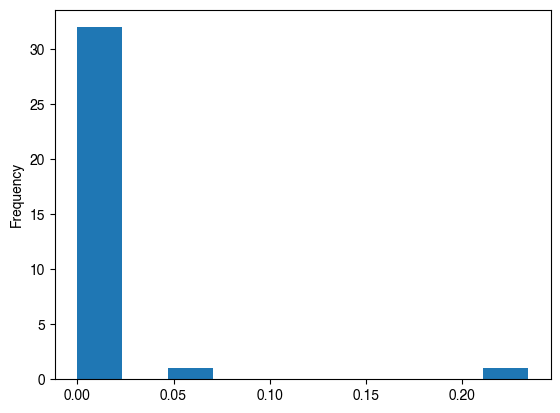

In [66]:
ck_df['fraction of uncontrollable states'].plot.hist()

# Make plots

### Average control kernel size prediction plots — random networks

In [73]:
minsize,maxsize = 0,20
markersize = 20
figsize = (3,2.5) #(5,4)
bottom,top,left,right = 0.2,0.95,0.2,0.95
uncontrollable_fraction_threshold = 0.99 #0.5

In [74]:
# filter based on uncontrollable fraction
dfExactRandomAll_Filtered = dfExactRandomAll[dfExactRandomAll['fraction of uncontrollable states']<uncontrollable_fraction_threshold]
print("We remove {} networks out of {} with proportion of states leading to uncontrollable attractors > {}.".format(
    len(dfExactRandomAll)-len(dfExactRandomAll_Filtered),len(dfExactRandomAll),uncontrollable_fraction_threshold))

We remove 29 networks out of 375 with proportion of states leading to uncontrollable attractors > 0.99.


This plot includes points for 346 networks.
There are 87 networks out of 346 with proportion of isolated fixed points > 0.0.


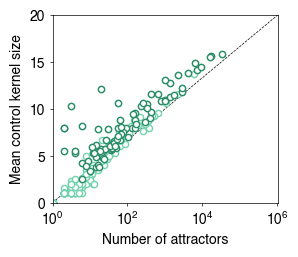

In [80]:
# plot control kernel size with respect to the number of attractors for random networks

plt.figure(figsize=figsize)
plt.scatter(dfExactRandomAll_Filtered['number of attractors'],
            dfExactRandomAll_Filtered['mean control kernel size'],
            s=markersize,
            label='Actual CK size',
            c='w',
            edgecolors=colors1['random'])
print("This plot includes points for {} networks.".format(dfExactRandomAll_Filtered['mean control kernel size'].count()))

# highlight networks with large proportion of isolated fixed points
threshold = 0.0
dfExactRandomAll_largeProp = dfExactRandomAll_Filtered[dfExactRandomAll_Filtered['number of isolated fixed points'] > threshold]
plt.scatter(dfExactRandomAll_largeProp['number of attractors'],
            dfExactRandomAll_largeProp['mean control kernel size'],
            s=markersize,
            label='Actual CK size',
            c='w',
            edgecolors=colors1['random dark'])
print("There are {} networks out of {} with proportion of isolated fixed points > {}.".format(
    len(dfExactRandomAll_largeProp),len(dfExactRandomAll_Filtered),threshold))

plt.xlabel('Number of attractors')
plt.ylabel('Mean control kernel size')
plt.xscale('log')
plt.plot([2**minsize,2**maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)

plt.axis(xmin=2**minsize,xmax=2**maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
makePretty()
plt.savefig('240206_ck_size_vs_num_attractors_random.pdf')

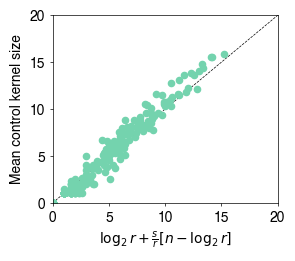

In [76]:
# plot actual ck size versus isolated approximation for random networks

plt.figure(figsize=figsize)
for ck_func in [predict_ck_separate_isolated,]:
    plt.scatter(dfExactRandomAll_Filtered[ck_func.__name__],
                dfExactRandomAll_Filtered['mean control kernel size'],
                label=ck_func.__name__,
                s=markersize,
                c=colors1['random']
                )

#plt.xlabel('$\\frac{r-s}{r} \log_2{r} + \\frac{s}{r} n$')
plt.xlabel('$\\log_2{r} + \\frac{s}{r} \\left[ n - \\log_2{r} \\right]$')
plt.ylabel('Mean control kernel size')
minsize,maxsize = 0,20
plt.plot([minsize,maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
plt.axis(xmin=minsize,xmax=maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
#plt.legend()
makePretty()
plt.savefig('240206_actual_versus_predicted_mean_ck_size_random_networks.pdf')

### Average control kernel size prediction plots — cell collective networks

In [65]:
# TO DO: CHECK 'proportion_of_isolated_fixed_points' in cell collective networks (ck_df)

In [83]:
# filter based on uncontrollable fraction
print("There are {} networks without data on uncontrollable fraction.".format(
    len(ck_df) - ck_df['fraction of uncontrollable states'].count()))

ck_df_Filtered = ck_df[ck_df['fraction of uncontrollable states']<uncontrollable_fraction_threshold]
print("We remove {} networks out of {} with proportion of states leading to uncontrollable attractors > {}.".format(
    len(ck_df)-len(ck_df_Filtered),len(ck_df),uncontrollable_fraction_threshold))

There are 15 networks without data on uncontrollable fraction.
We remove 15 networks out of 49 with proportion of states leading to uncontrollable attractors > 0.99.


This plot includes points for 34 networks.
There are 6 networks out of 49 with proportion of isolated fixed points > 0.0.


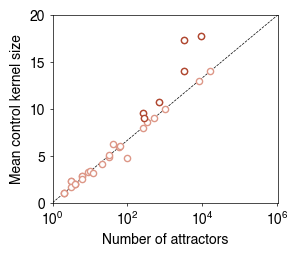

In [85]:
# plot control kernel size with respect to the number of attractors for cell collective networks

plt.figure(figsize=figsize)
plt.scatter(ck_df_Filtered['number of attractors'],
            ck_df_Filtered['mean control kernel size'],
            s=markersize,
            label='Actual CK size',
            edgecolors=colors1['cellcollective'],
            c='w')
print("This plot includes points for {} networks.".format(ck_df_Filtered['mean control kernel size'].count()))

# highlight networks with large proportion of isolated fixed points
threshold = 0.0
ck_df_largeProp = ck_df_Filtered[ck_df_Filtered['number of isolated fixed points'] > threshold]
plt.scatter(ck_df_largeProp['number of attractors'],
            ck_df_largeProp['mean control kernel size'],
            s=markersize,
            label='Actual CK size',
            c='w',
            edgecolors=colors1['cellcollective dark'])
print("There are {} networks out of {} with proportion of isolated fixed points > {}.".format(
    len(ck_df_largeProp),len(ck_df),threshold))

plt.xlabel('Number of attractors')
plt.ylabel('Mean control kernel size')
plt.xscale('log')
plt.plot([2**minsize,2**maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
#plt.legend()
plt.axis(xmin=2**minsize,xmax=2**maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
makePretty()
plt.savefig('240208_ck_size_vs_num_attractors_cell_collective.pdf')

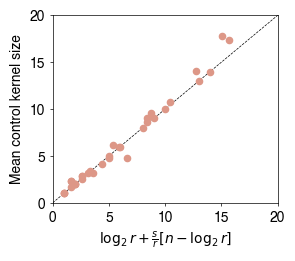

In [86]:
# plot actual ck size versus isolated approximation for cell collective networks

plt.figure(figsize=figsize)
for ck_func in [predict_ck_separate_isolated,]:
    plt.scatter(ck_df_Filtered[ck_func.__name__],
                ck_df_Filtered['mean control kernel size'],
                label=ck_func.__name__,
                s=markersize,
                c=colors1['cellcollective'])

#plt.xlabel('$\\frac{r-s}{r} \log_2{r} + \\frac{s}{r} n$')
plt.xlabel('$\\log_2{r} + \\frac{s}{r} \\left[ n - \\log_2{r} \\right]$')
plt.ylabel('Mean control kernel size')
minsize,maxsize = 0,20
plt.plot([minsize,maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
plt.axis(xmin=minsize,xmax=maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
#plt.legend()
makePretty()
plt.savefig('240208_actual_versus_predicted_mean_ck_size_cell_collective_networks.pdf')

### 2024/2/2 adding iowa plots

There are 60 networks from the Iowa database in this dataframe.


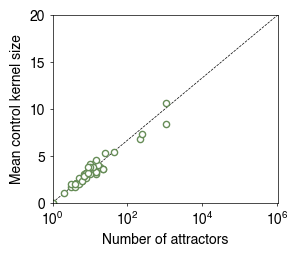

In [87]:
# plot control kernel size with respect to the number of attractors for iowa networks

plt.figure(figsize=figsize)
plt.scatter(dfIowa['number of attractors'],
            dfIowa['mean control kernel size'],
            s=markersize,
            label='Actual CK size',
            edgecolors=colors1['other'],
            c='w')

# # highlight networks with large proportion of isolated fixed points
# threshold = 0.0
# ck_df_largeProp = ck_df[ck_df['number of isolated fixed points'] > threshold]
# plt.scatter(ck_df_largeProp['number of attractors'],
#             ck_df_largeProp['mean control kernel size'],
#             s=markersize,
#             label='Actual CK size',
#             c='w',
#             edgecolors=colors1['cellcollective dark'])
# print("There are {} networks out of {} with proportion of isolated fixed points > {}".format(
#     len(ck_df_largeProp),len(ck_df),threshold))

plt.xlabel('Number of attractors')
plt.ylabel('Mean control kernel size')
plt.xscale('log')
plt.plot([2**minsize,2**maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
#plt.legend()
plt.axis(xmin=2**minsize,xmax=2**maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
makePretty()
#plt.savefig('240130_ck_size_vs_num_attractors_cell_collective.pdf')

print("There are {} networks from the Iowa database in this dataframe.".format(len(dfIowa)))

### 2024/1/30 histograms grouped by network

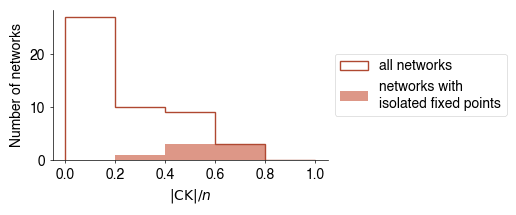

In [38]:
# isolated and non-isolated histograms grouped by networks (cell collective networks)
plt.figure(figsize=(5,2))

bins = np.linspace(0,1,6)
plt.hist(ck_df['mean control kernel size']/ck_df['size'],
         histtype='step',
         bins=bins,
        density=False,
         color=colors1['cellcollective dark'],
         label='all networks',
        )
ck_df_with_isolated = ck_df[ck_df['number of isolated fixed points'] > 0]
plt.hist(ck_df_with_isolated['mean control kernel size']/ck_df_with_isolated['size'],
        bins=bins,
        density=False,
        color=colors1['cellcollective'],
        label='networks with \nisolated fixed points')

# fiddle with main plot
leg = plt.legend(loc='center left',bbox_to_anchor=[1, 0.5])
#plt.yticks([0,2.5,5],[])
plt.xlabel('$|\mathrm{CK}|/n$')
plt.ylabel('Number of networks')
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.075,right=0.625)
plt.gca().spines[['right', 'top']].set_visible(False)
makePretty(leg=leg)
plt.savefig('240207_ck_histogram_by_network_isolated_and_nonisolated_cell_collective.pdf')

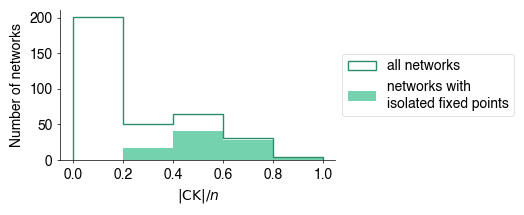

In [37]:
# isolated and non-isolated histograms grouped by networks (random networks)
plt.figure(figsize=(5,2))

bins = np.linspace(0,1,6)
plt.hist(dfExactRandomAll['mean control kernel size']/dfExactRandomAll['size'],
         histtype='step',
         bins=bins,
        density=False,
        color=colors1['random dark'],
        label='all networks')
dfExactRandomAll_with_isolated = dfExactRandomAll[dfExactRandomAll['number of isolated fixed points'] > 0]
plt.hist(dfExactRandomAll_with_isolated['mean control kernel size']/dfExactRandomAll_with_isolated['size'],
        bins=bins,
        density=False,
        color=colors1['random'],
        label='networks with \nisolated fixed points')

# fiddle with main plot
leg = plt.legend(loc='center left',bbox_to_anchor=[1, 0.5])
#plt.yticks([0,2.5,5],[])
plt.xlabel('$|\mathrm{CK}|/n$')
plt.ylabel('Number of networks')
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.075,right=0.625)
plt.gca().spines[['right', 'top']].set_visible(False)
makePretty(leg=leg)
plt.savefig('240207_ck_histogram_by_network_isolated_and_nonisolated_random.pdf')

### Individual attractor plots

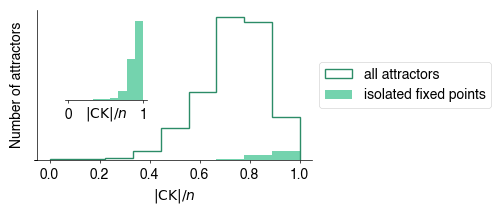

In [88]:
# isolated and non-isolated histograms for all random networks 
plt.figure(figsize=(5,2))

bins = np.linspace(0,1,10)
# plt.hist(relative_ck_sizes_nonisolated,density=False,bins=bins,histtype='step',label='non-isolated',
#          color=colors1['random dark'])
plt.hist(relative_ck_sizes_nonisolated+relative_ck_sizes_isolated,
         density=False,bins=bins,histtype='step',label='all attractors',
         color=colors1['random dark'])
plt.hist(relative_ck_sizes_isolated,density=False,bins=bins,label='isolated fixed points',
         color=colors1['random'])

inset = plt.gca().inset_axes([0.1,0.4,0.3,0.55])
inset.hist(relative_ck_sizes_isolated,density=False,bins=bins,label='isolated',
         color=colors1['random'])

# fiddle with main plot
leg = plt.legend(loc='center left',bbox_to_anchor=[1, 0.5])
plt.yticks([0,2.5,5],[])
plt.xlabel('$|\mathrm{CK}|/n$')
plt.ylabel('Number of attractors')
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.075,right=0.625)
plt.gca().spines[['right', 'top']].set_visible(False)
makePretty(leg=leg)

# fiddle with inset
inset.spines[['right', 'top','left']].set_visible(False)
inset.set_yticks([])
inset.set_xlabel('$|\mathrm{CK}|/n$',labelpad=-12)
makePretty(ax=inset)

plt.savefig('240207_ck_histogram_isolated_vs_nonisolated_random.pdf')

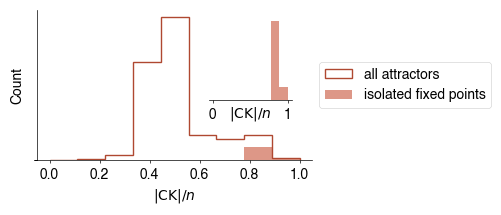

In [89]:
# isolated and non-isolated histograms for cell collective networks 
plt.figure(figsize=(5,2))

bins = np.linspace(0,1,10)
# plt.hist(relative_ck_sizes_nonisolated_cc,density=False,bins=bins,histtype='step',label='non-isolated',
#          color=colors1['cellcollective dark'])
plt.hist(relative_ck_sizes_nonisolated_cc+relative_ck_sizes_isolated_cc,
         density=False,bins=bins,histtype='step',label='all attractors',
         color=colors1['cellcollective dark'])
plt.hist(relative_ck_sizes_isolated_cc,density=False,bins=bins,label='isolated fixed points',
         color=colors1['cellcollective'])

inset = plt.gca().inset_axes([0.625,0.4,0.3,0.55])
inset.hist(relative_ck_sizes_isolated_cc,density=False,bins=bins,label='isolated',
         color=colors1['cellcollective'])

# fiddle with main plot
leg = plt.legend(loc='center left',bbox_to_anchor=[1, 0.5])
plt.yticks([0,2.5,5],[])
plt.xlabel('$|\mathrm{CK}|/n$')
plt.ylabel('Count')
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.075,right=0.625)
plt.gca().spines[['right', 'top']].set_visible(False)
makePretty(leg=leg)

# fiddle with inset
inset.spines[['right', 'top','left']].set_visible(False)
inset.set_yticks([])
inset.set_xlabel('$|\mathrm{CK}|/n$',labelpad=-12)
makePretty(ax=inset)

plt.savefig('240126_ck_histogram_isolated_vs_nonisolated_cell_collective.pdf')

### 2024/1/30 are networks with isolated fixed points the only ones with maximal control kernels?

In [90]:
# 2024/1/30 do we only have maximal cks when there exist isolated fixed points?
random_with_isolated = dfExactRandomAll[dfExactRandomAll['proportion_of_isolated_fixed_points'] > 0].index

# count number of max ck attractors in each network
for name in dataDictExactRandom:
    if 'control_kernel_sizes' in dataDictExactRandom[name]:
        num_max_cks = np.sum(np.array(dataDictExactRandom[name]['control_kernel_sizes']) == dataDictExactRandom[name]['size'])
        dfExactRandomAll.loc[name,'number_of_maximal_cks'] = num_max_cks

# find networks with maximal cks
random_with_maximal = dfExactRandomAll[dfExactRandomAll['number_of_maximal_cks'] > 0].index

# compute intersection
print("{} random networks with isolated fixed points, {} with maximal cks, {} with both.".format(
    len(random_with_isolated),
    len(random_with_maximal),
    len(random_with_isolated.intersection(random_with_maximal))))

93 random networks with isolated fixed points, 73 with maximal cks, 73 with both.


In [91]:
# 2024/1/30 do we only have maximal cks when there exist isolated fixed points?
cc_with_isolated = ck_df[ck_df['number of isolated fixed points'] > 0].index

# count number of max ck attractors in each network
for name in dataDictExact:
    if 'control_kernel_sizes' in dataDictExact[name]:
        num_max_cks = np.sum(np.array(dataDictExact[name]['control_kernel_sizes']) == dataDictExact[name]['size'])
        ck_df.loc[name,'number_of_maximal_cks'] = num_max_cks

# find networks with maximal cks
cc_with_maximal = ck_df[ck_df['number_of_maximal_cks'] > 0].index

# compute intersection
print("{} cell collective networks with isolated fixed points, {} with maximal cks, {} with both.".format(
    len(cc_with_isolated),
    len(cc_with_maximal),
    len(cc_with_isolated.intersection(cc_with_maximal))))

7 cell collective networks with isolated fixed points, 6 with maximal cks, 6 with both.


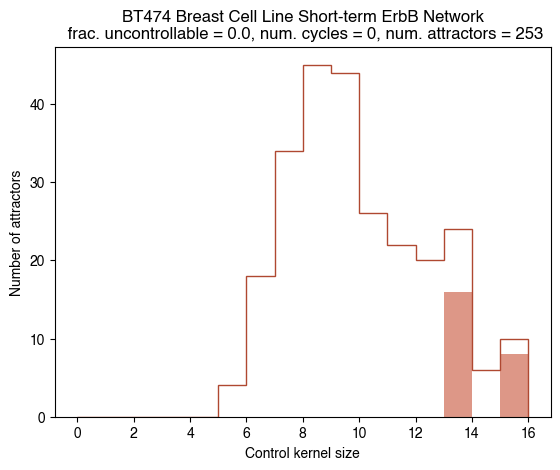

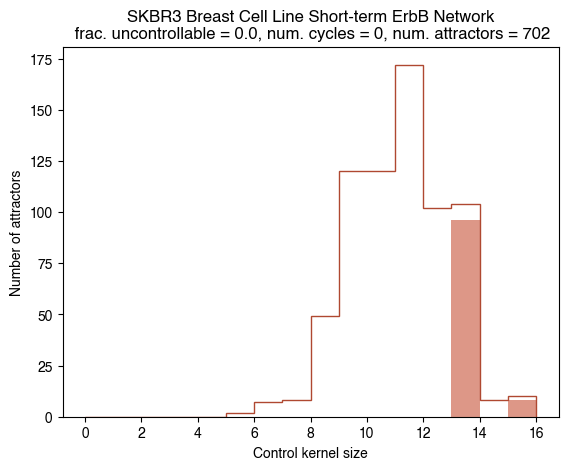

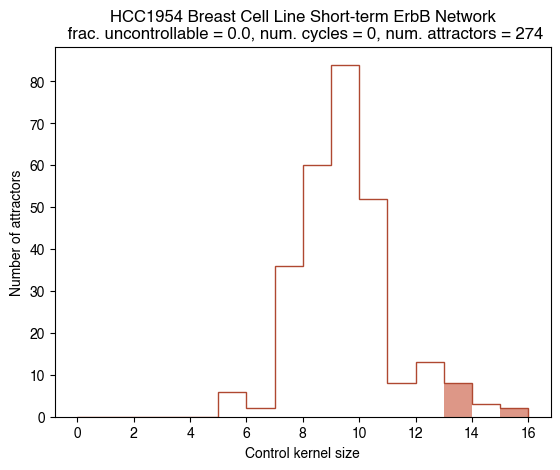

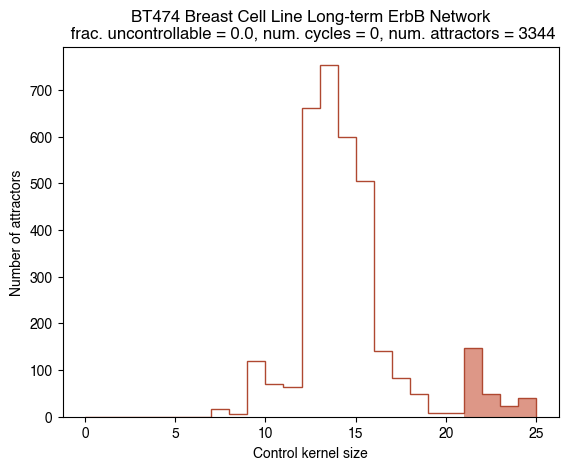

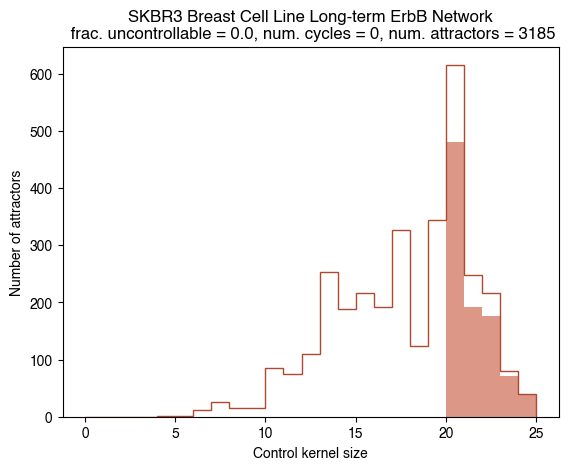

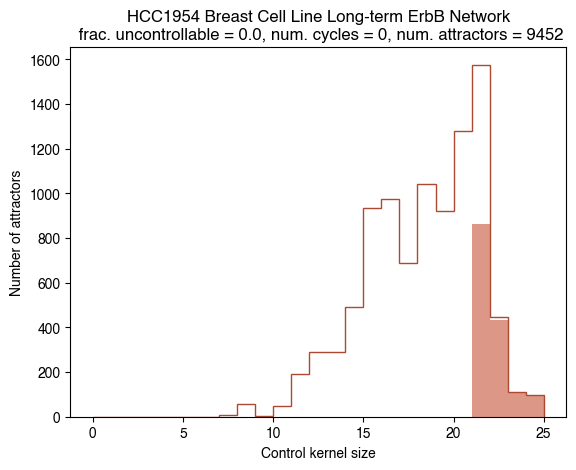

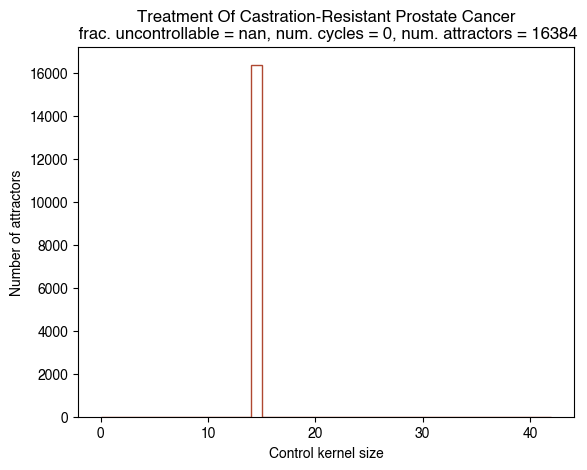

In [97]:
for name in cc_with_isolated:
    plt.figure()
    ck_sizes = basinDataDict[directory_name(name)]['control_kernel_sizes']
    is_isolated_list = basinDataDict[directory_name(name)]['is_isolated_list']
    bins = range(ck_df.loc[name,'size']+1)
    plt.hist(ck_sizes,bins=bins,histtype='step',
             color=colors1['cellcollective dark'])
    plt.hist([ ck_sizes[i] for i in range(len(ck_sizes)) if is_isolated_list[i] ],
             bins=bins,color=colors1['cellcollective'])
    plt.xlabel('Control kernel size')
    plt.ylabel('Number of attractors')
    plt.title('{}\n frac. uncontrollable = {}, num. cycles = {}, num. attractors = {}'.format(
                name,
                ck_df.loc[name,'fraction of uncontrollable states'],
                ck_df.loc[name,'number of cycles'],
                ck_df.loc[name,'number of attractors']))

In [23]:
# TO DO: Which random networks were we unable to compute control kernels for?

In [93]:
dfExactRandomAll['number of cycles'] = \
    dfExactRandomAll['number of attractors'] - dfExactRandomAll['number of fixed point attractors']
dfExactRandomAll['fraction of cycles'] = dfExactRandomAll['number of cycles']/dfExactRandom['number of attractors']

No control kernel data for random_72_tp0.5_seed8856
No control kernel data for random_72_tpNone_seed8856


/var/folders/2y/r9yfmnys37xd00fknrv2tgym0000gn/T/ipykernel_93268/38333681.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


No control kernel data for random_73_tpNone_seed8979
No control kernel data for random_74_tp0.5_seed9102


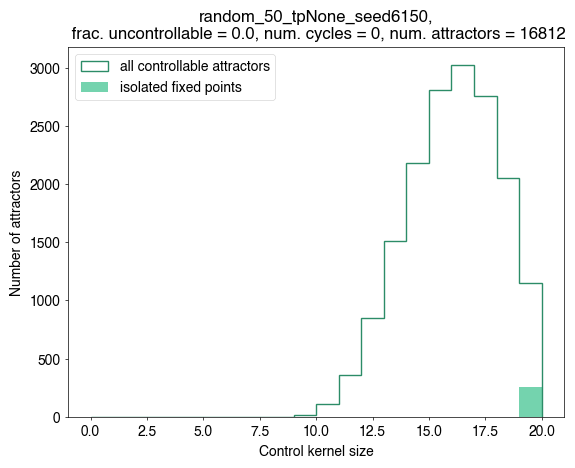

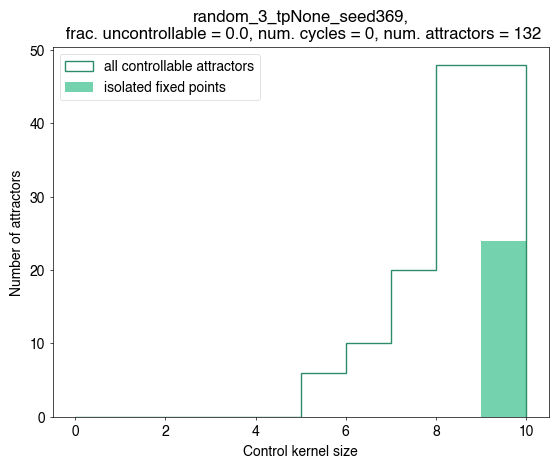

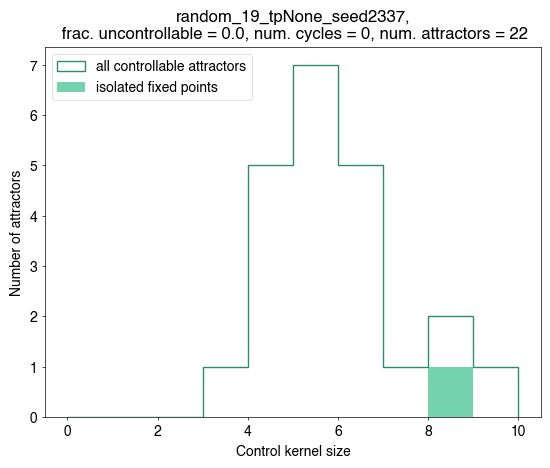

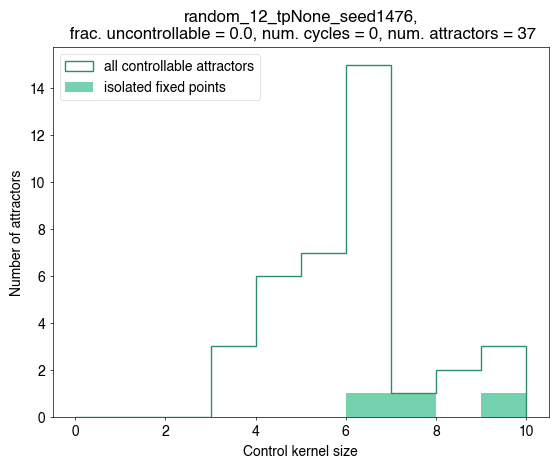

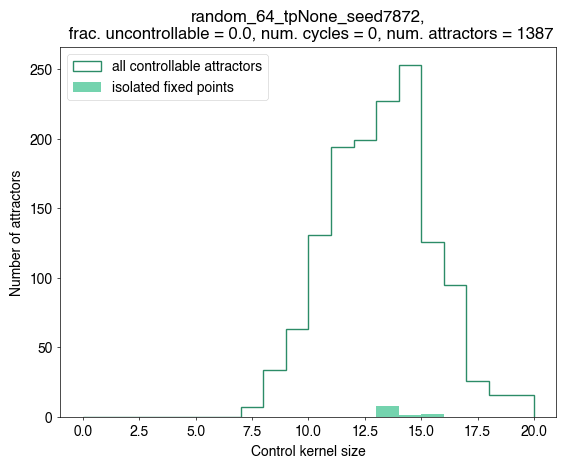

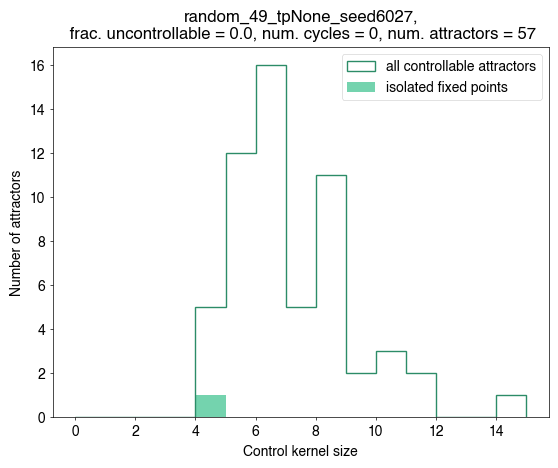

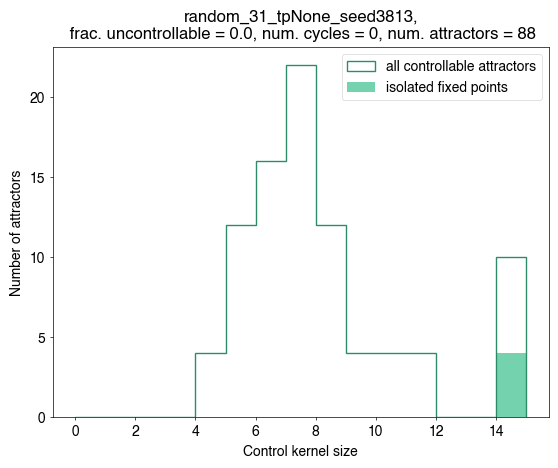

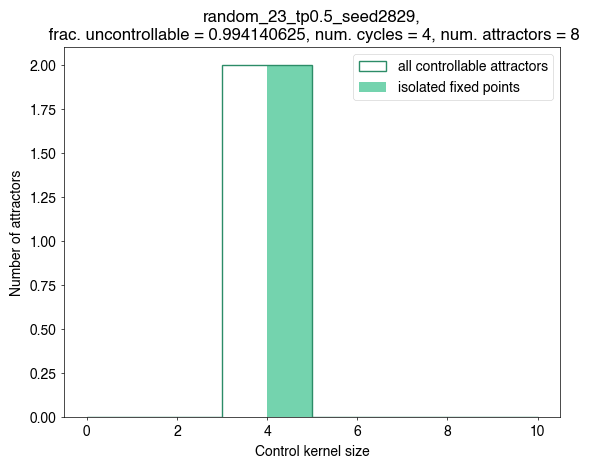

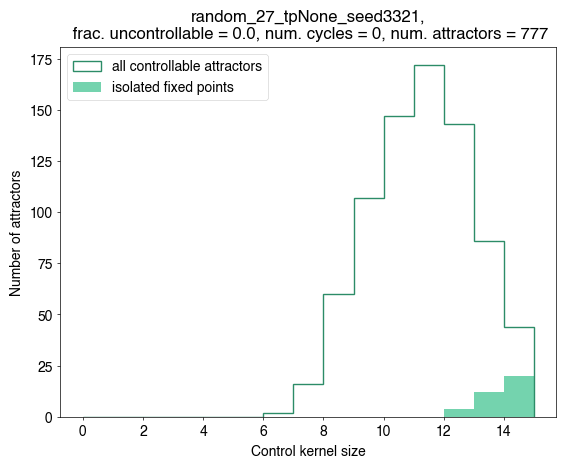

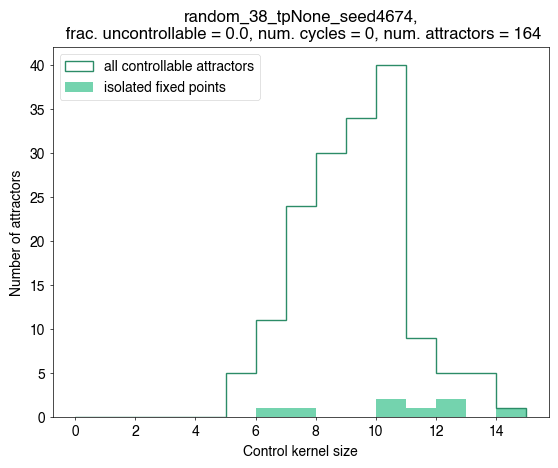

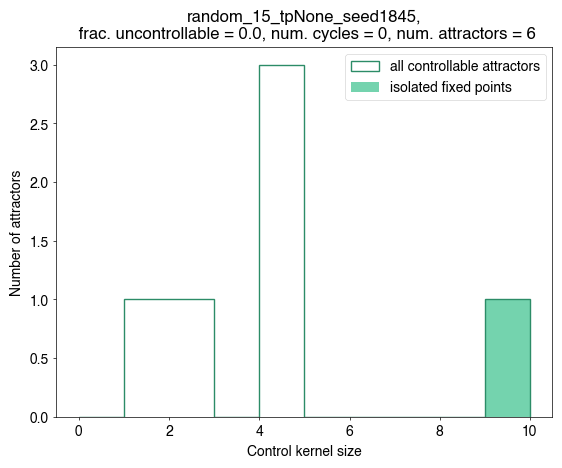

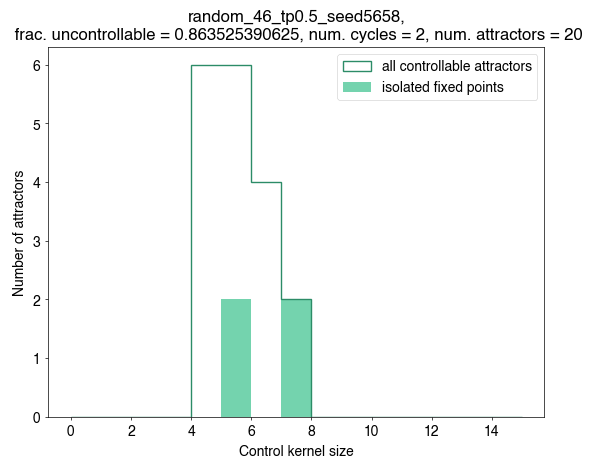

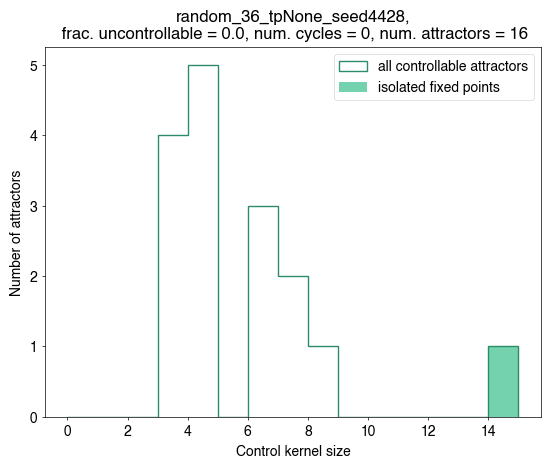

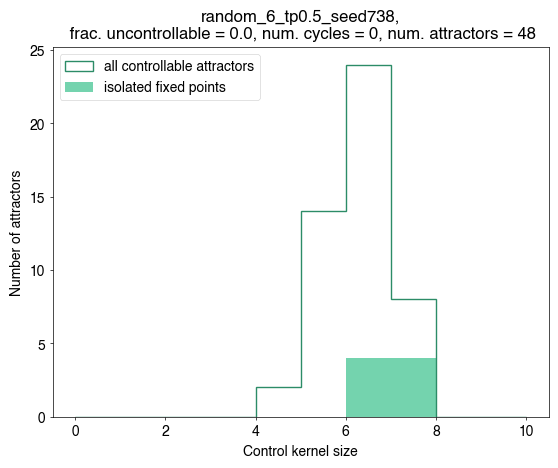

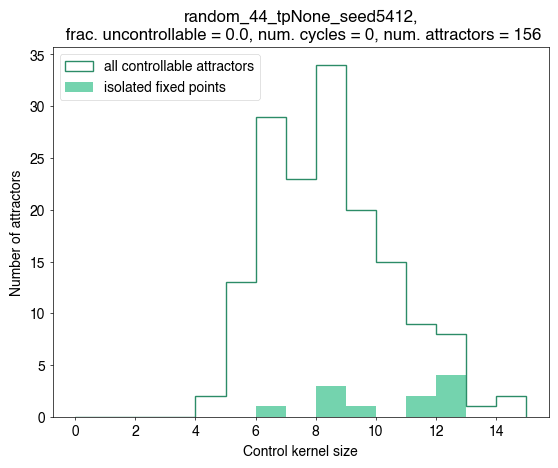

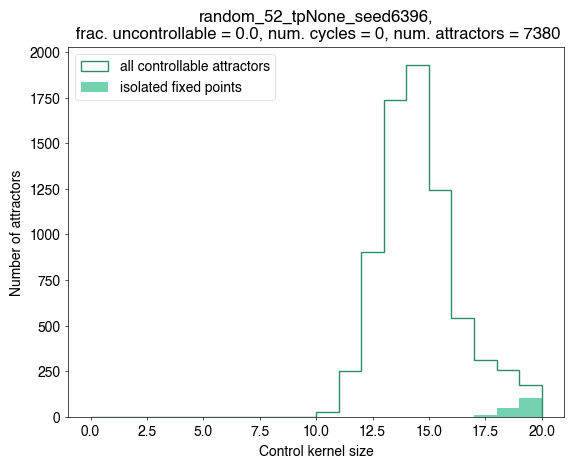

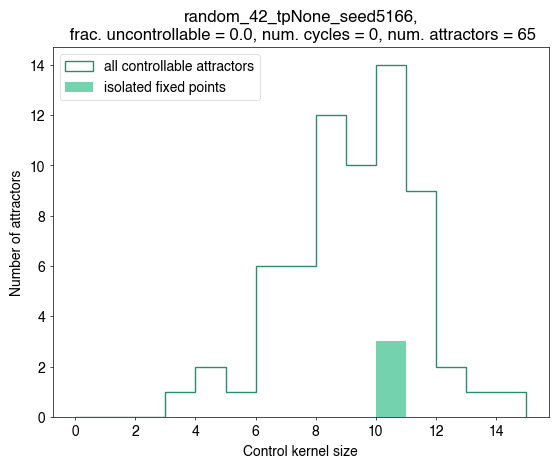

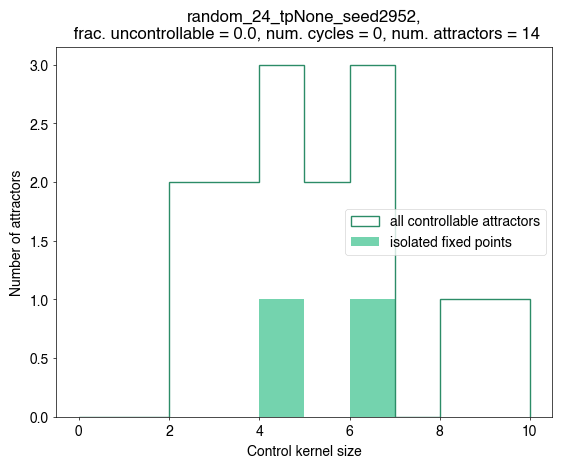

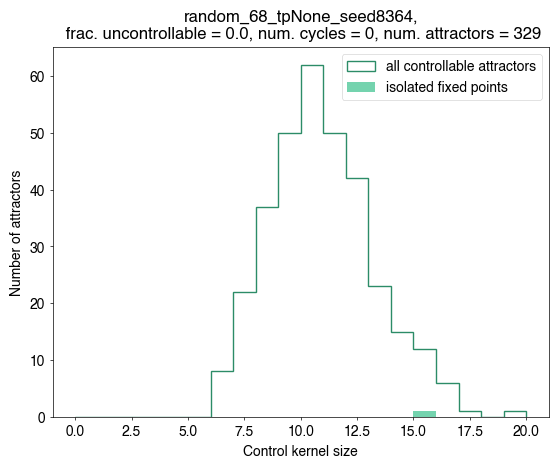

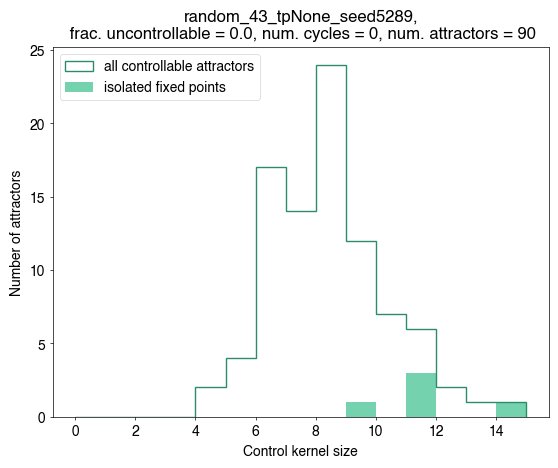

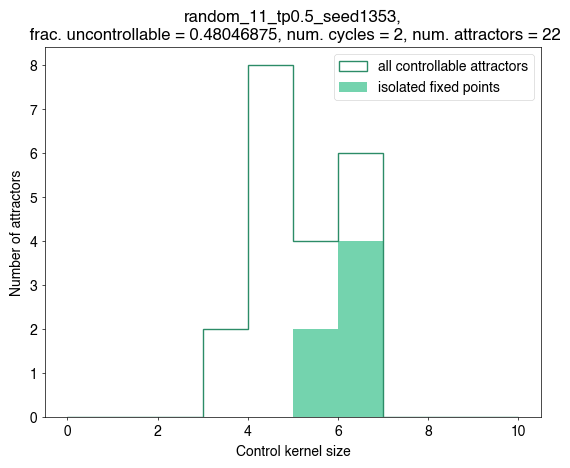

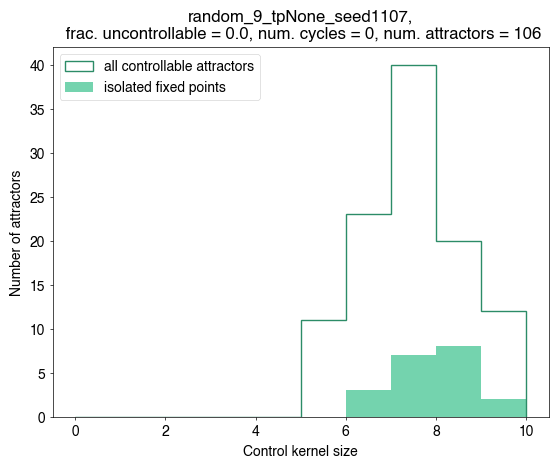

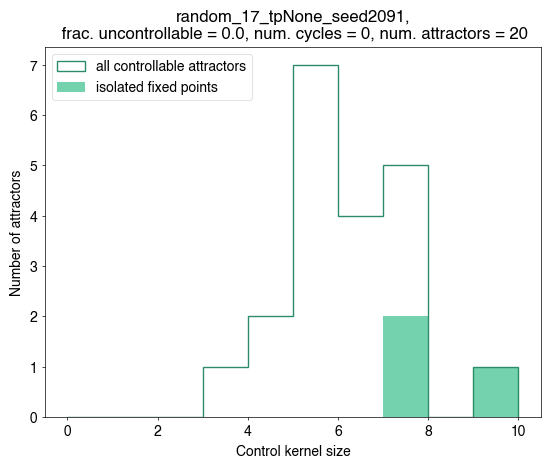

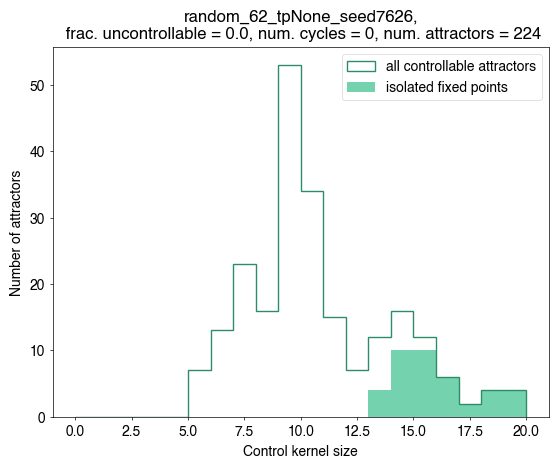

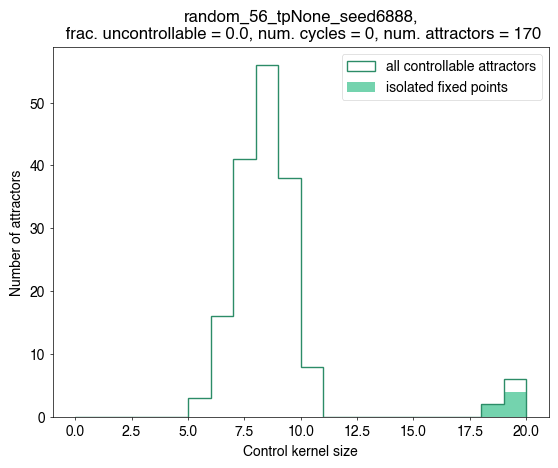

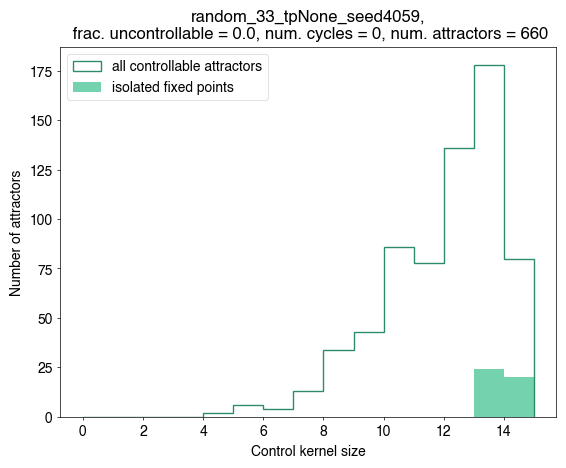

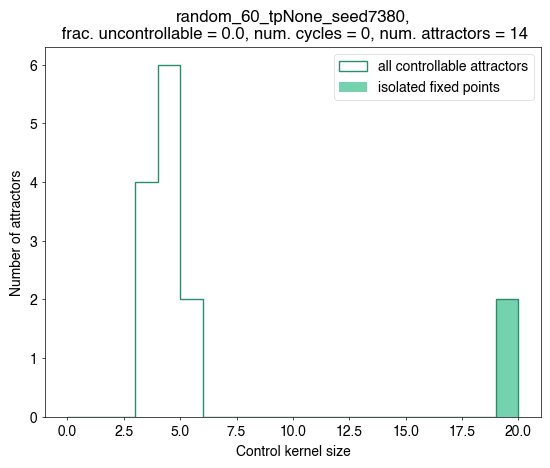

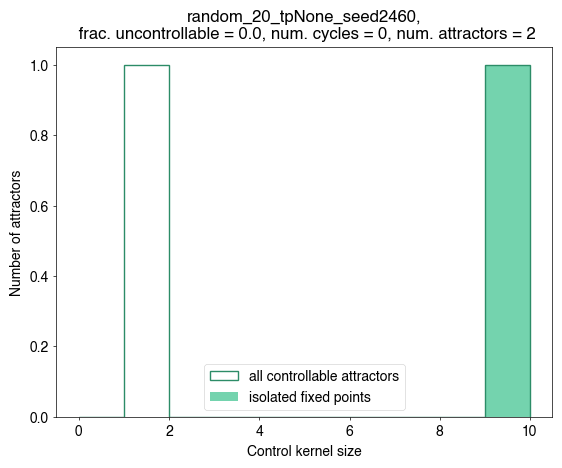

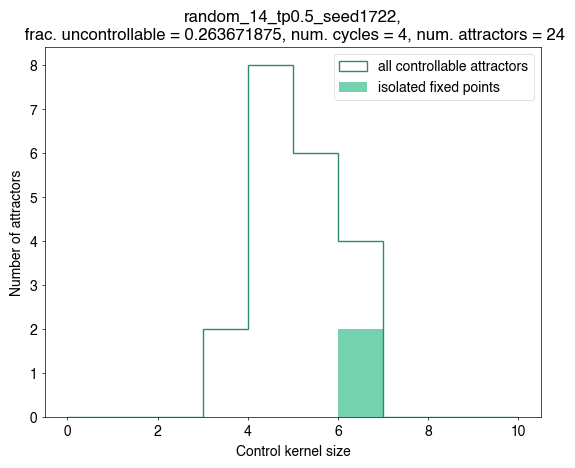

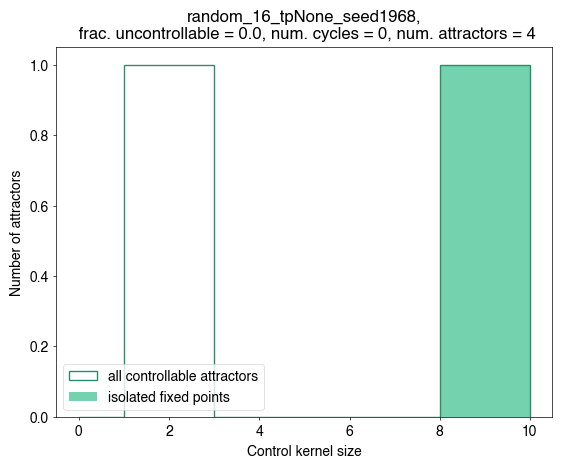

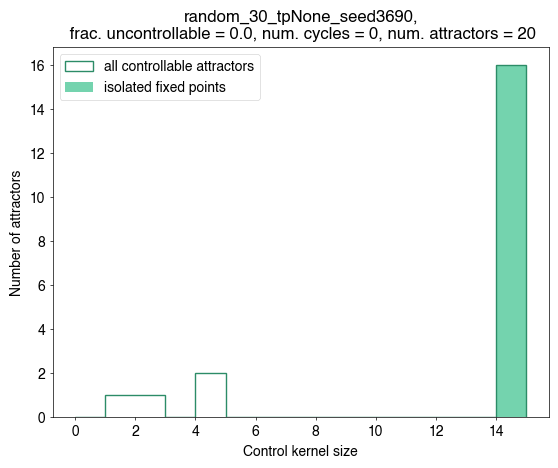

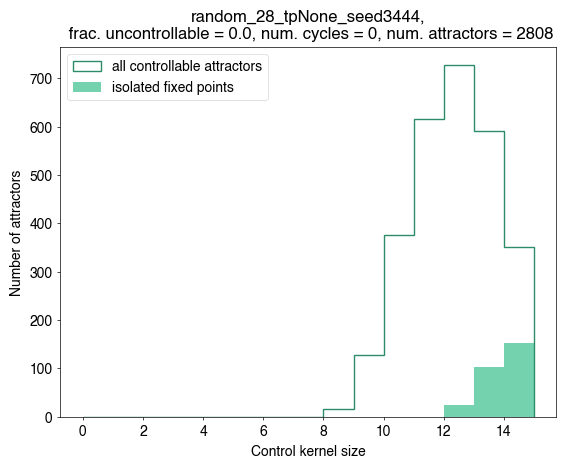

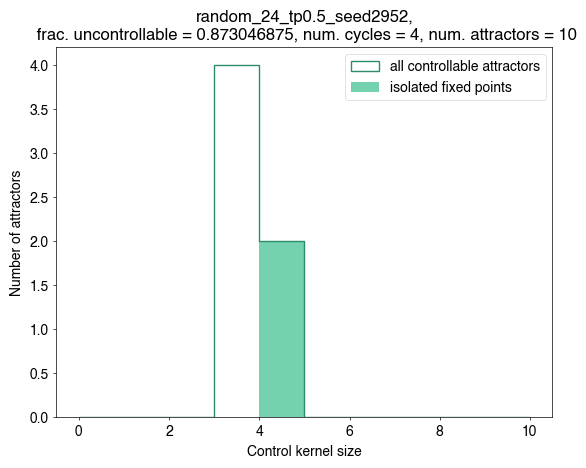

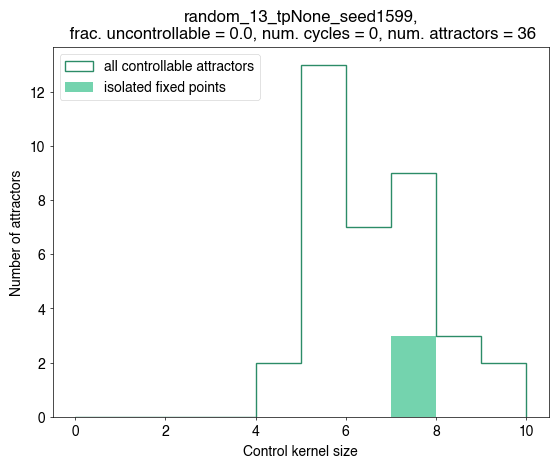

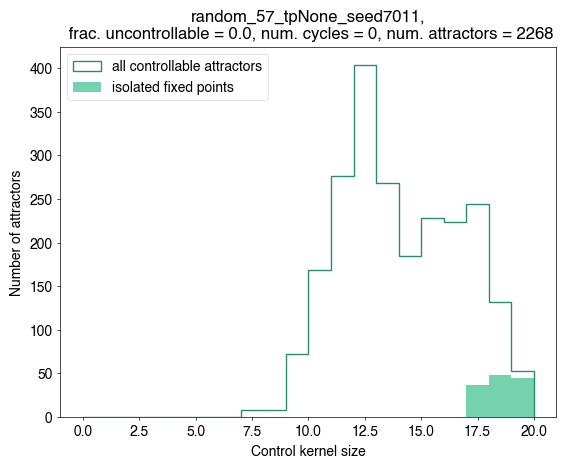

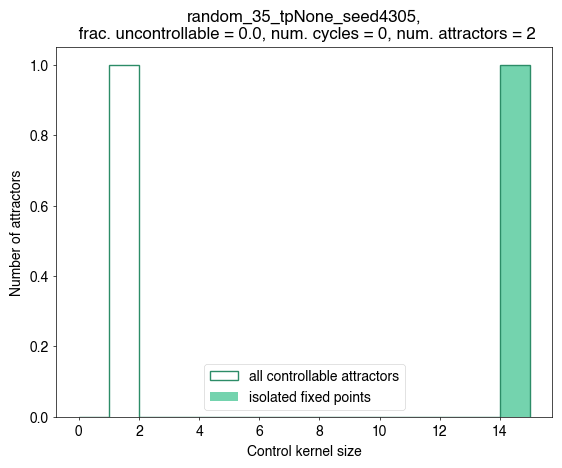

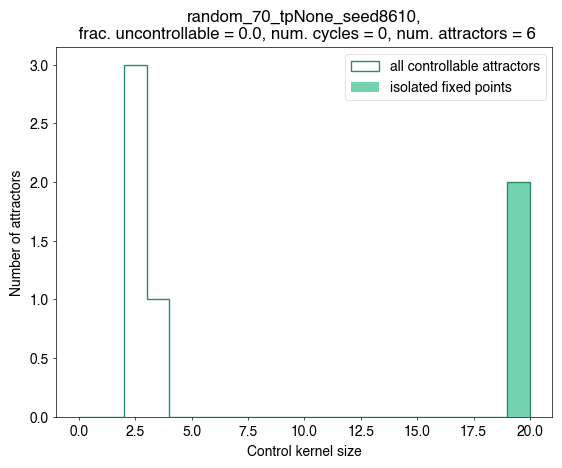

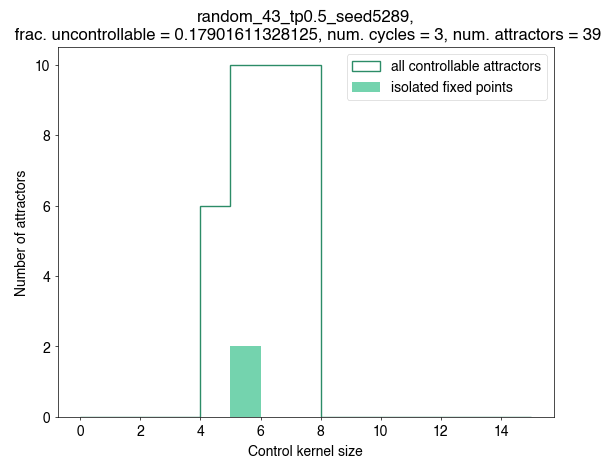

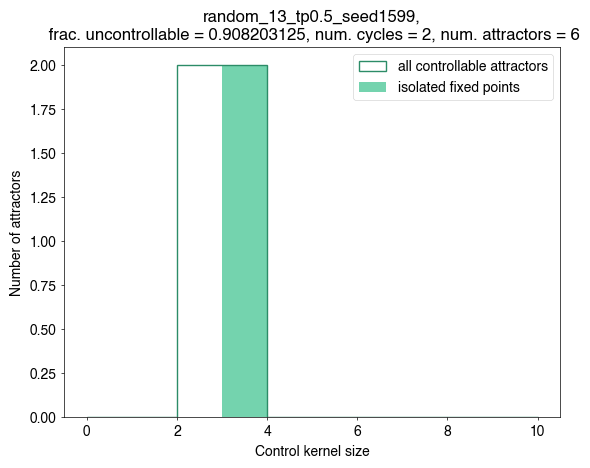

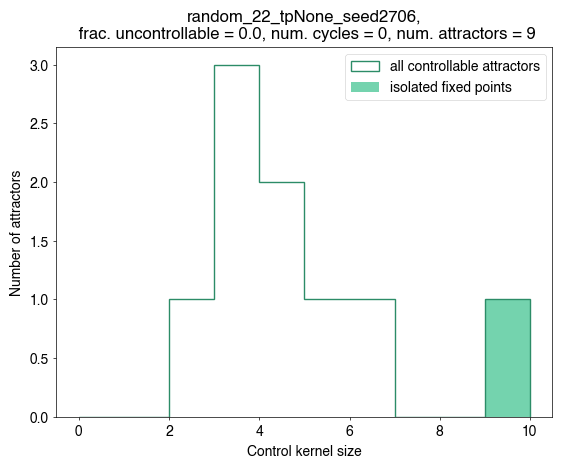

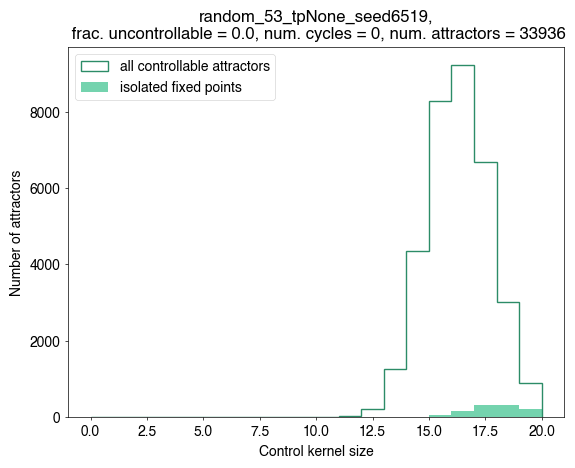

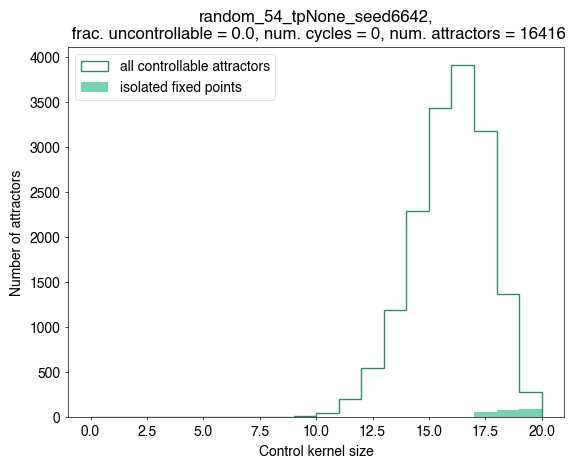

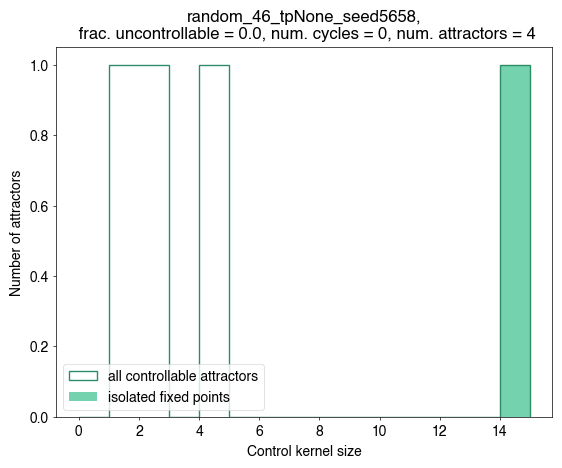

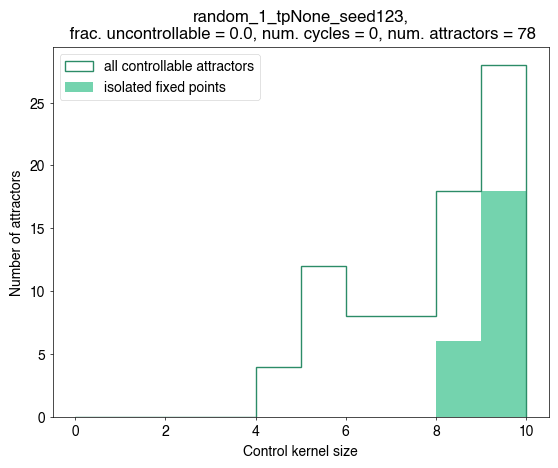

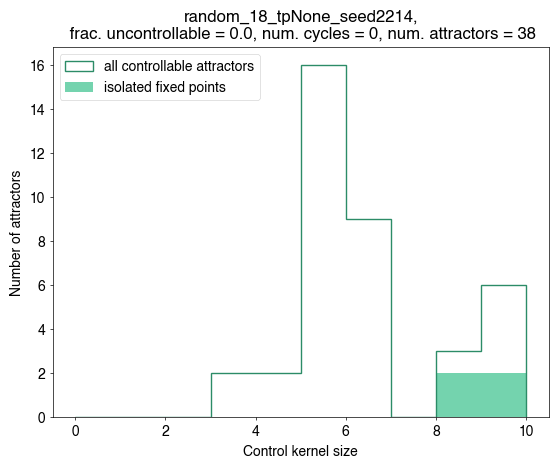

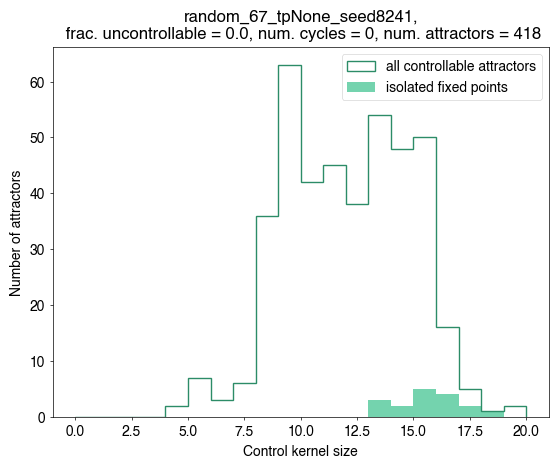

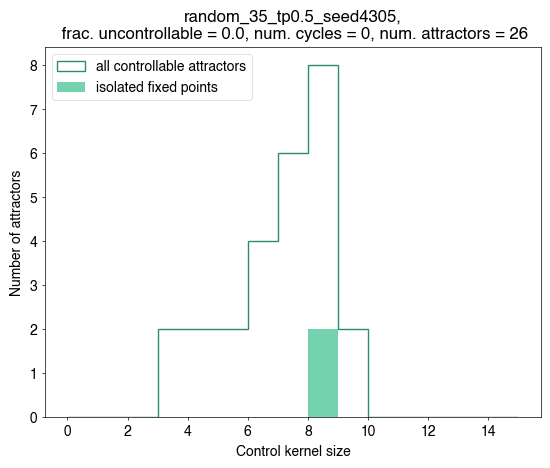

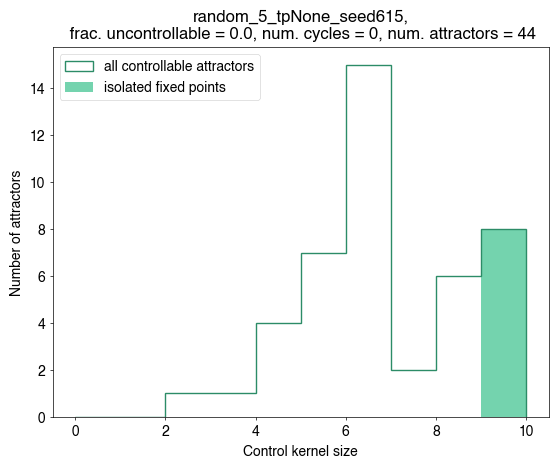

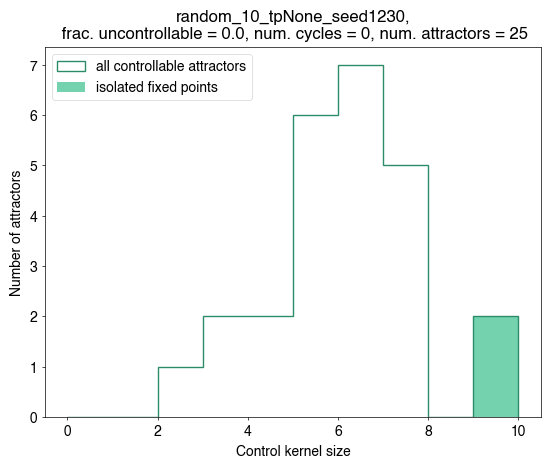

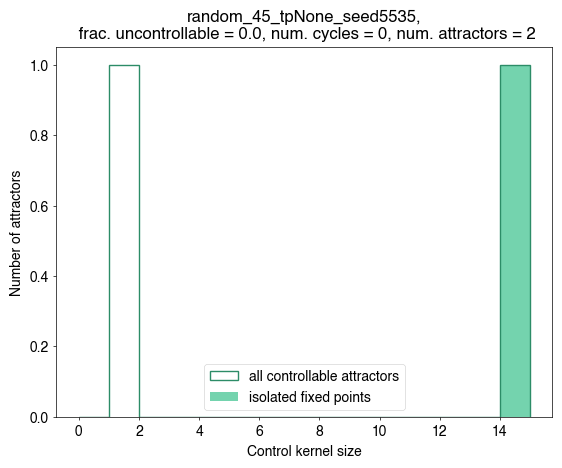

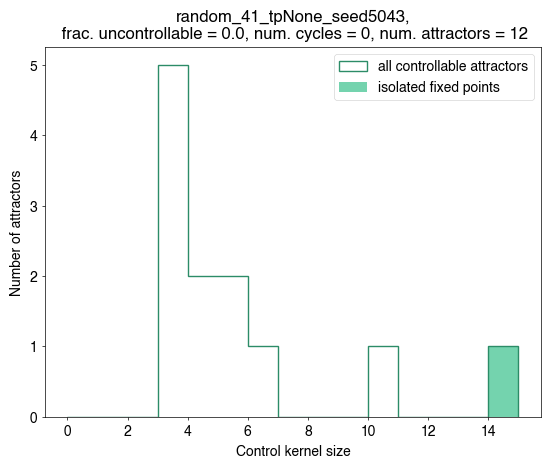

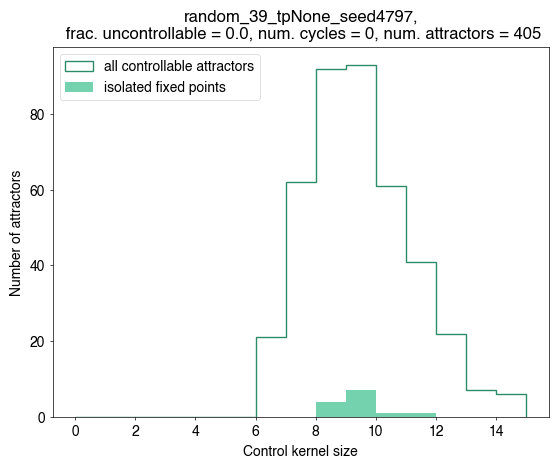

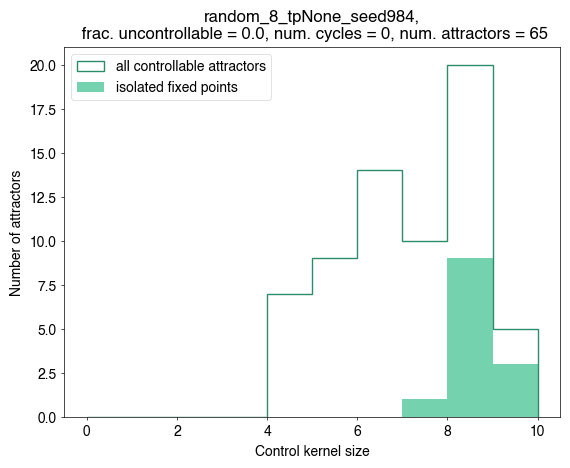

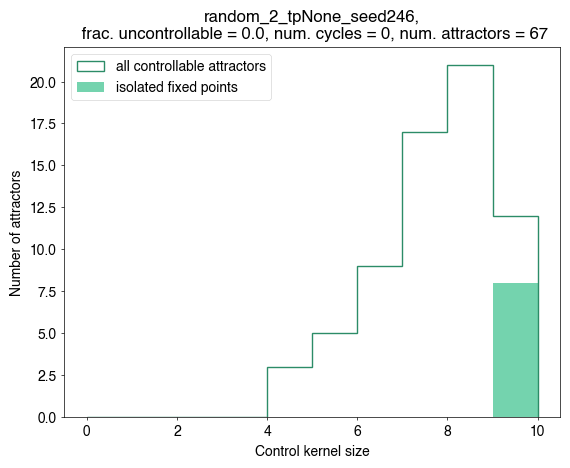

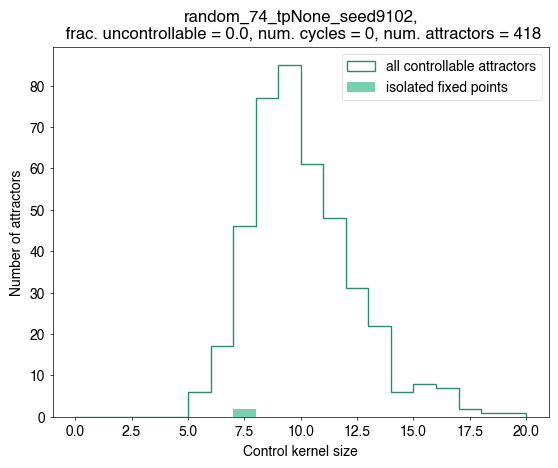

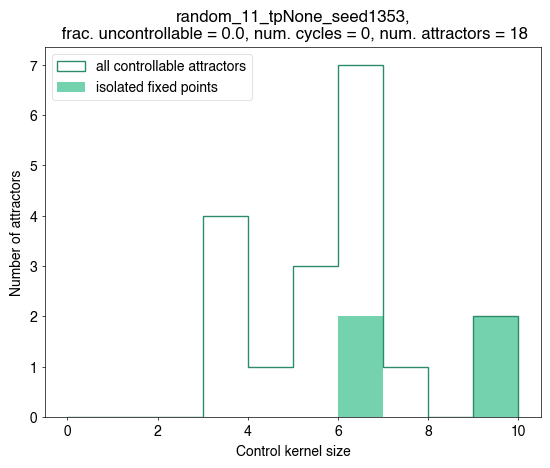

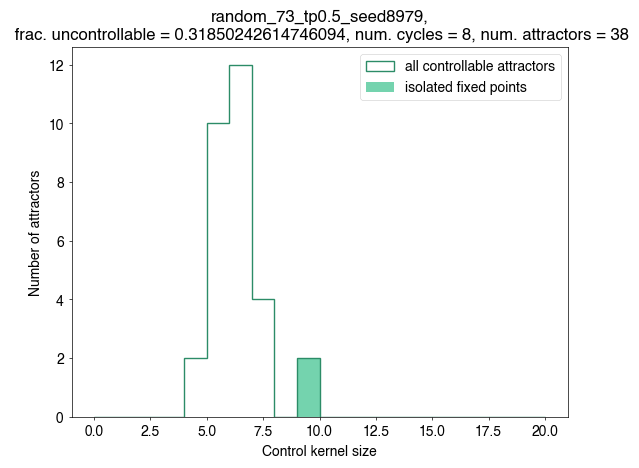

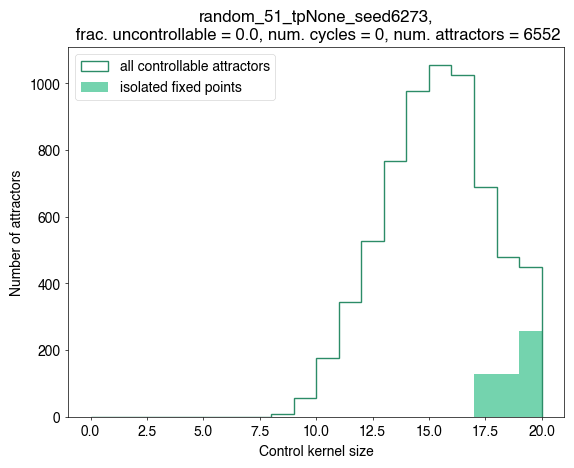

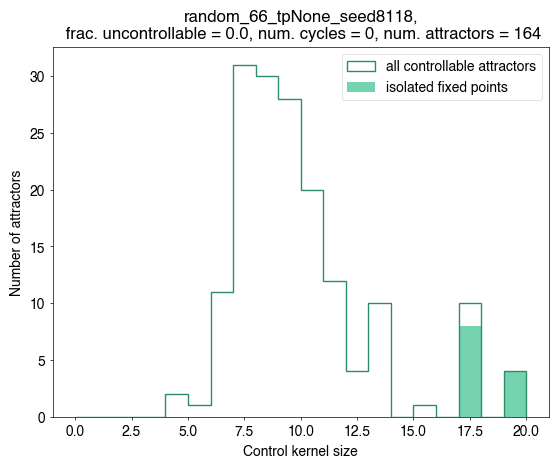

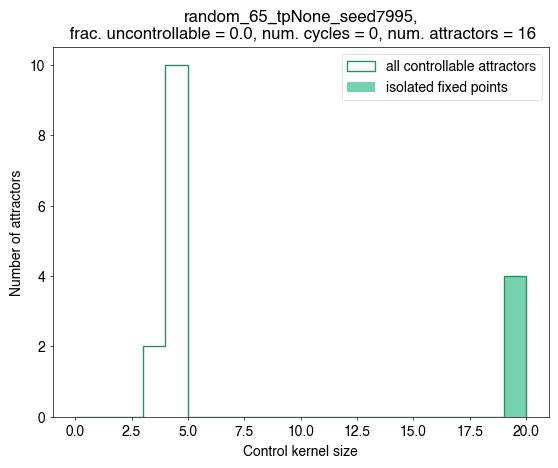

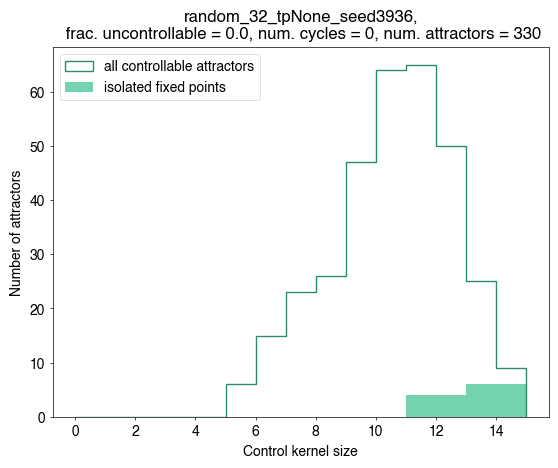

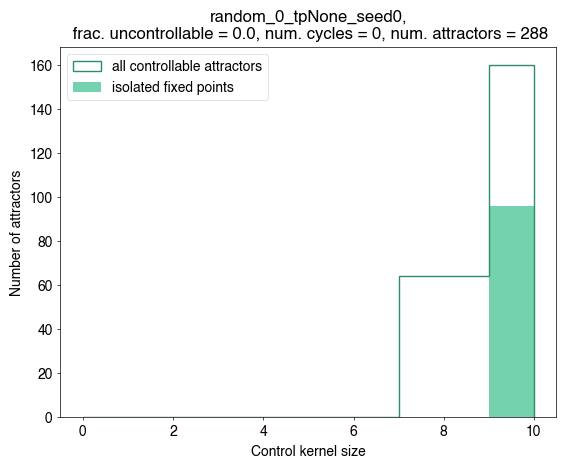

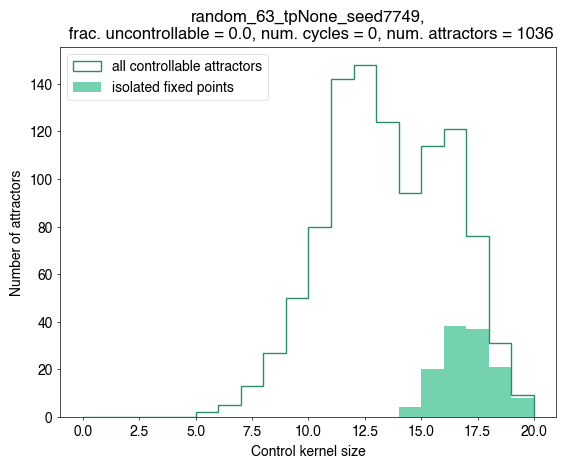

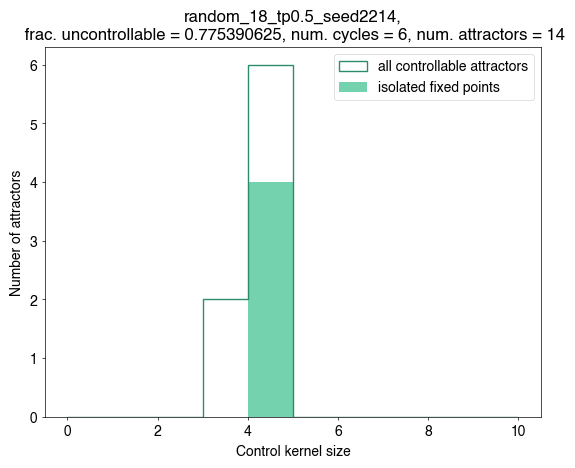

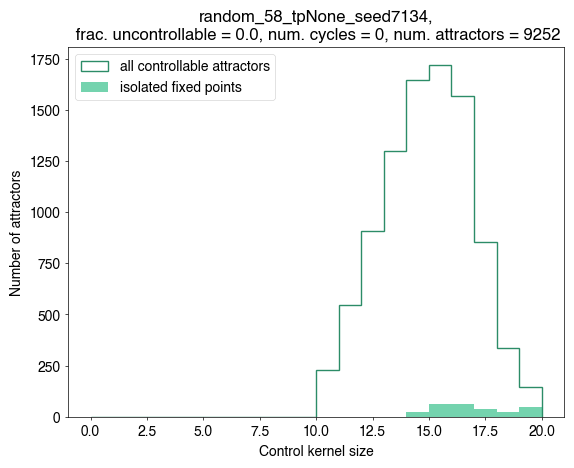

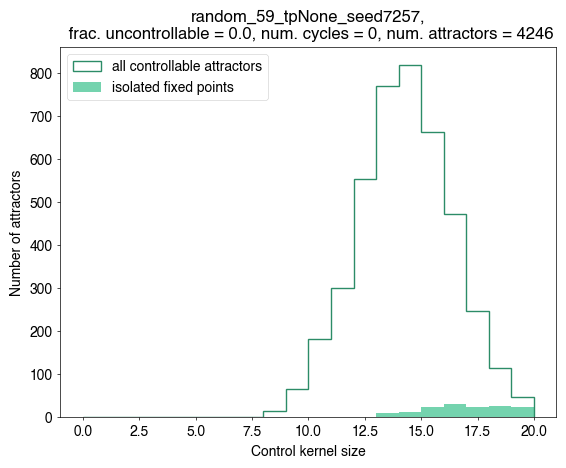

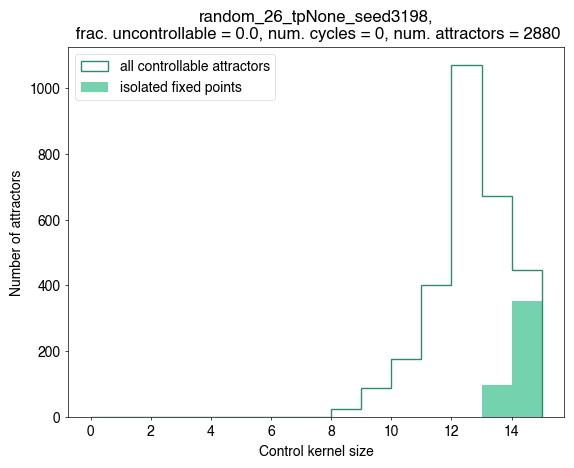

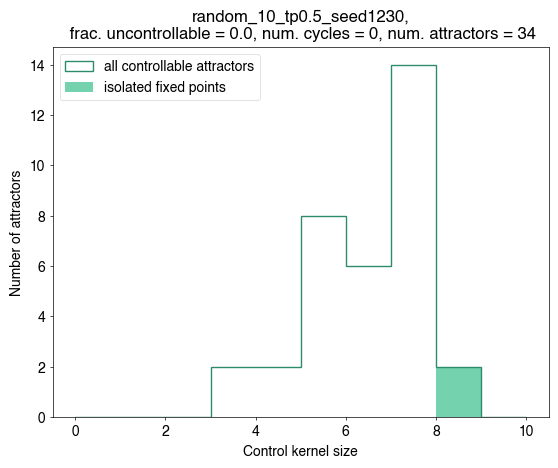

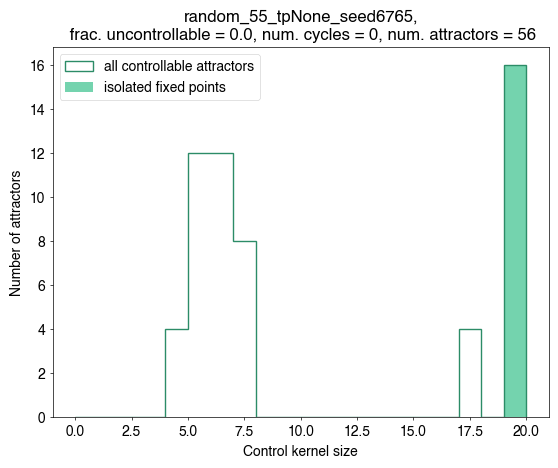

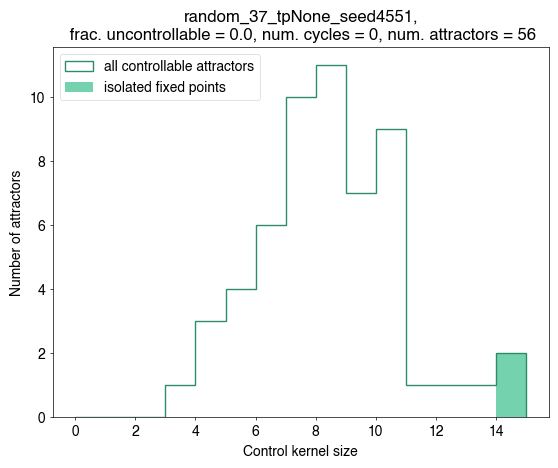

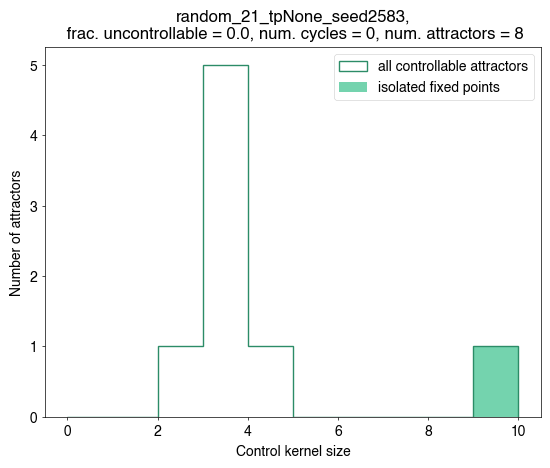

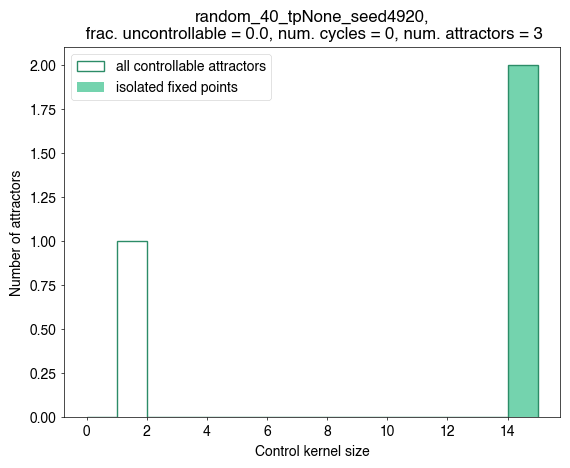

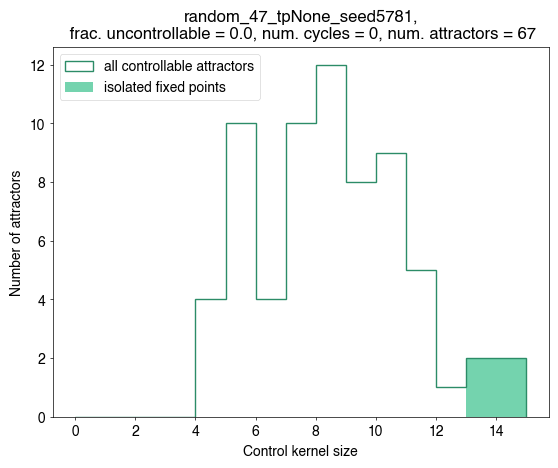

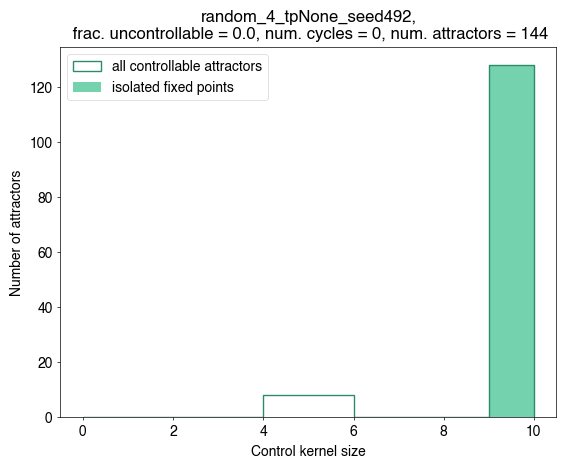

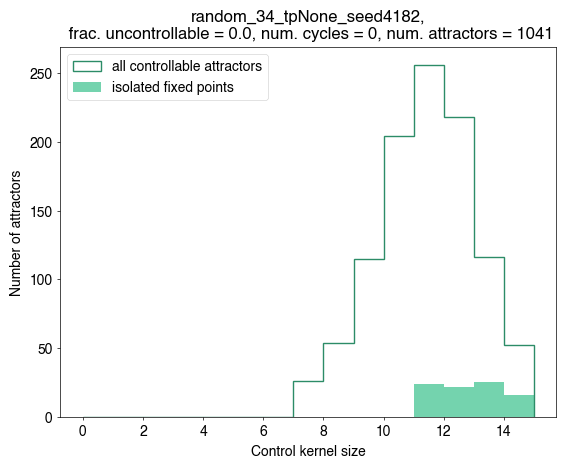

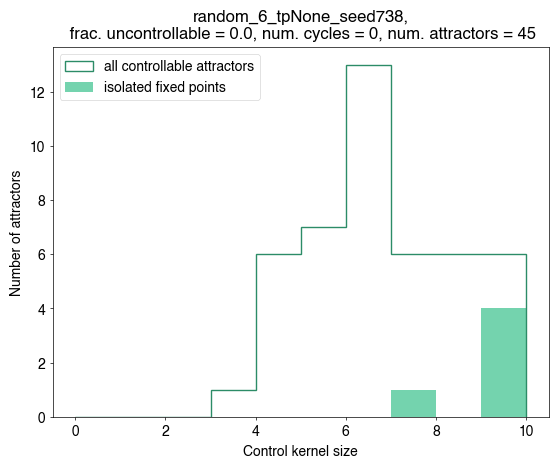

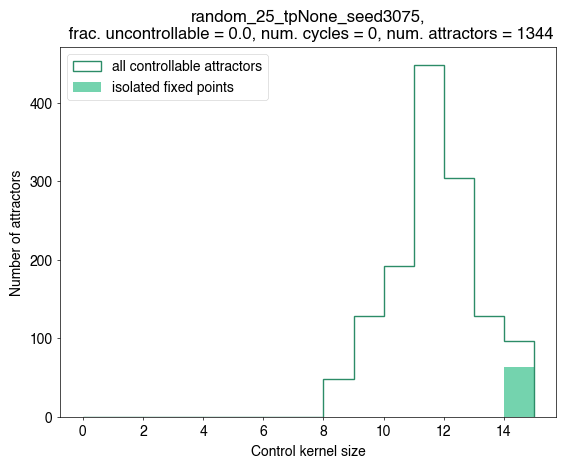

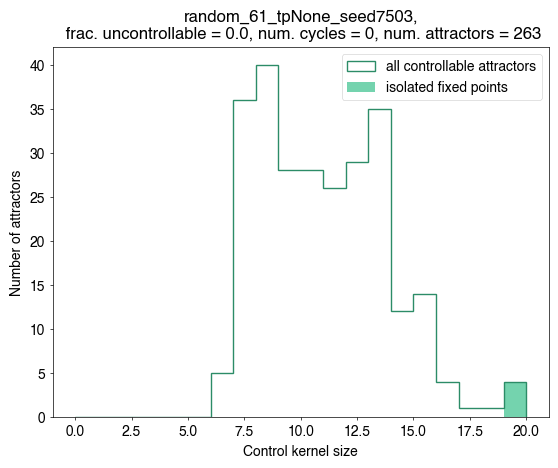

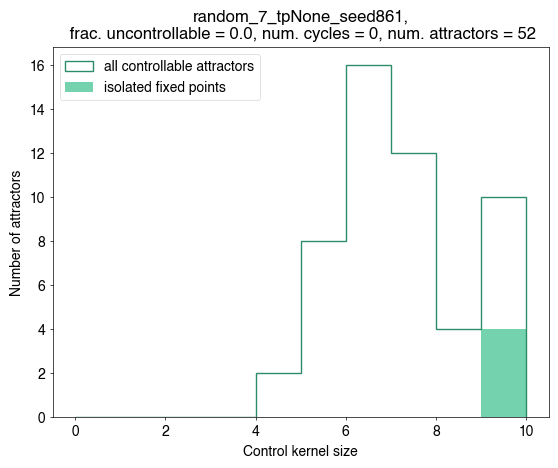

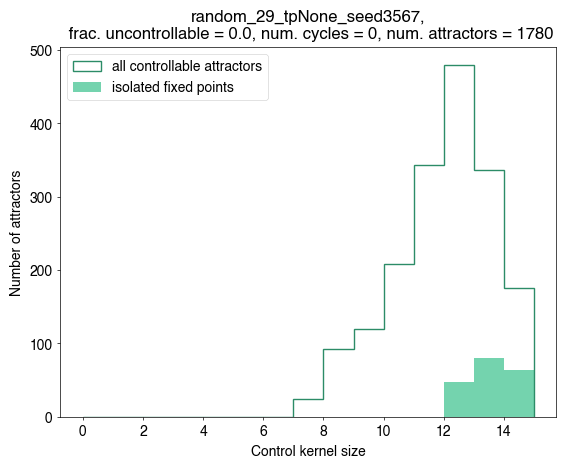

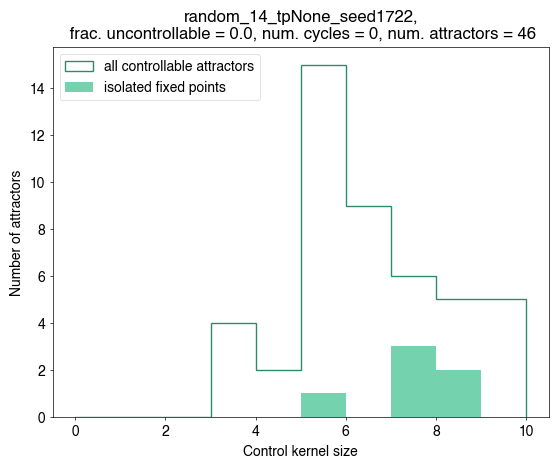

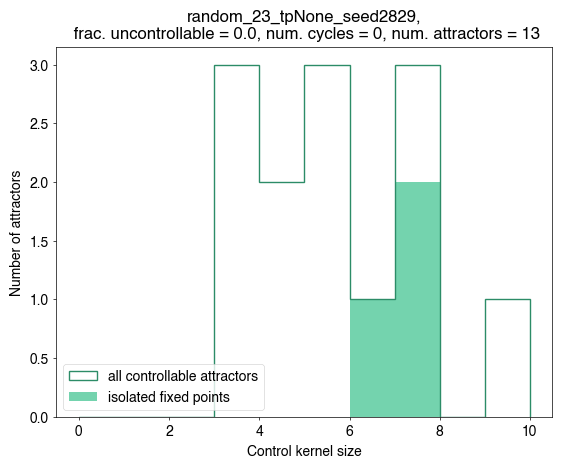

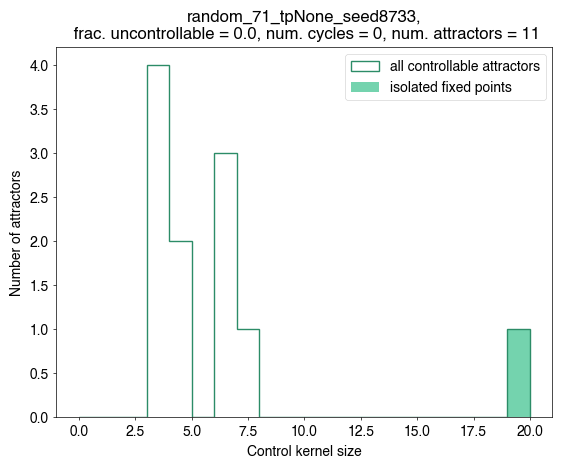

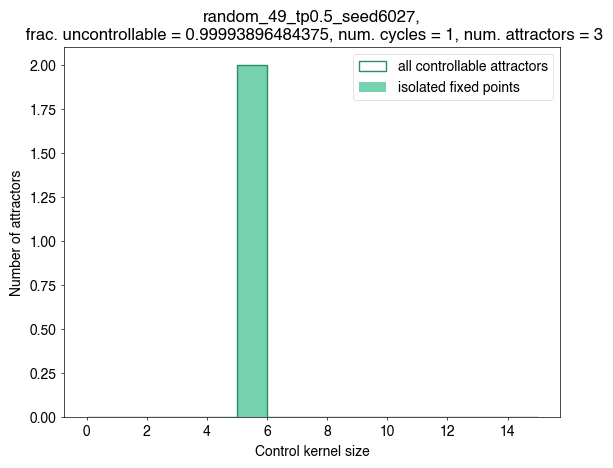

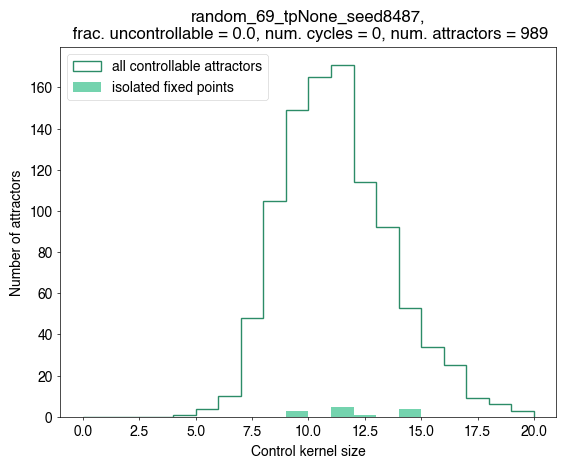

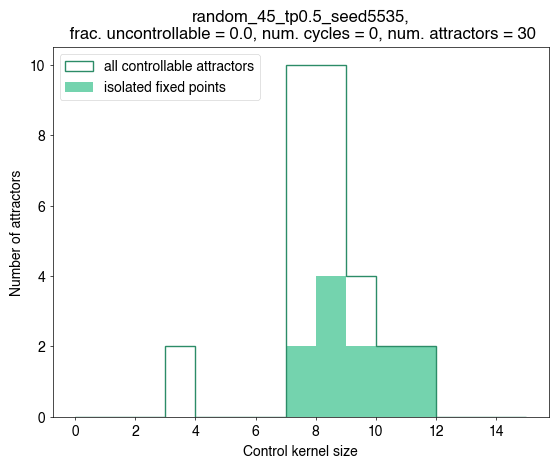

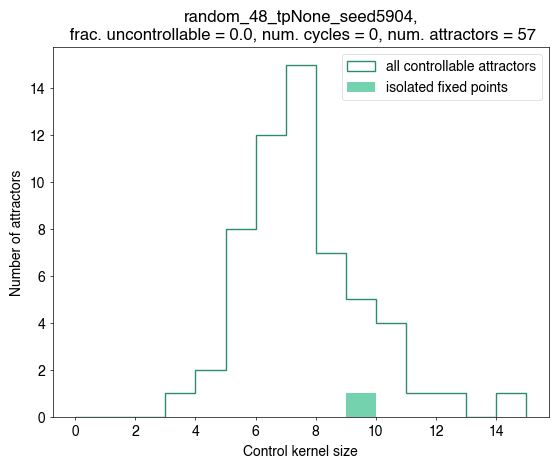

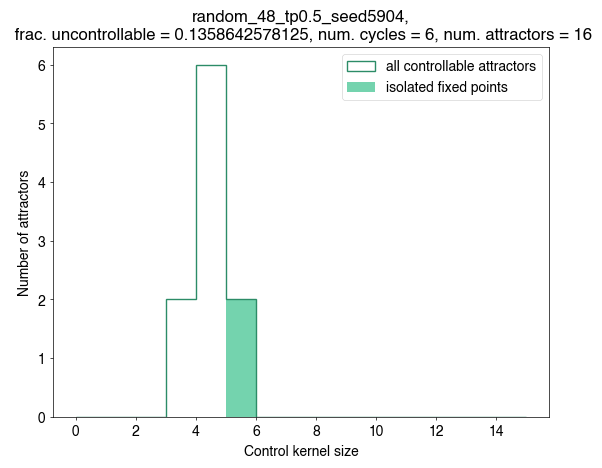

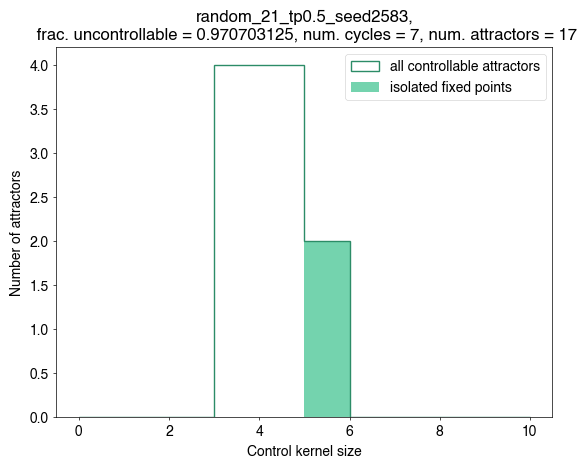

In [103]:
uncontrollable_threshold = 10.
for name in random_with_isolated: #['random_49_tp0.5_seed6027']
    #if dfExactRandomAll.loc[name,'number of connected components'] == 1:
    if 'control_kernel_sizes_ordered' in basinDataExactRandom[name]:
        if dfExactRandomAll.loc[name,'fraction of uncontrollable states'] < uncontrollable_threshold:
            plt.figure()
            ck_sizes = basinDataExactRandom[name]['control_kernel_sizes_ordered']
            is_isolated_list = basinDataExactRandom[name]['is_isolated_list_ordered']
            #bins = range(max([size for size in ck_sizes if size is not None])+1)
            bins = range(dfExactRandomAll.loc[name,'size']+1)
            plt.hist([ size for size in ck_sizes if size is not None ],
                     bins=bins,
                     histtype='step',
                     color=colors1['random dark'],
                     label='all controllable attractors')
            plt.hist([ ck_sizes[i] for i in range(len(ck_sizes)) if is_isolated_list[i] ],
                     bins=bins,
                     color=colors1['random'],
                     label='isolated fixed points')
            leg = plt.legend()
            plt.xlabel('Control kernel size')
            plt.ylabel('Number of attractors')
            plt.title('{},\n frac. uncontrollable = {}, num. cycles = {}, num. attractors = {}'.format(
                name,
                dfExactRandomAll.loc[name,'fraction of uncontrollable states'],
                dfExactRandomAll.loc[name,'number of cycles'],
                dfExactRandomAll.loc[name,'number of attractors']))
            makePretty(leg=leg)
        else:
            print("Uncontrollable basins are too large for network {}".format(name))
    else:
        print("No control kernel data for {}".format(name))

# other plots that were cut

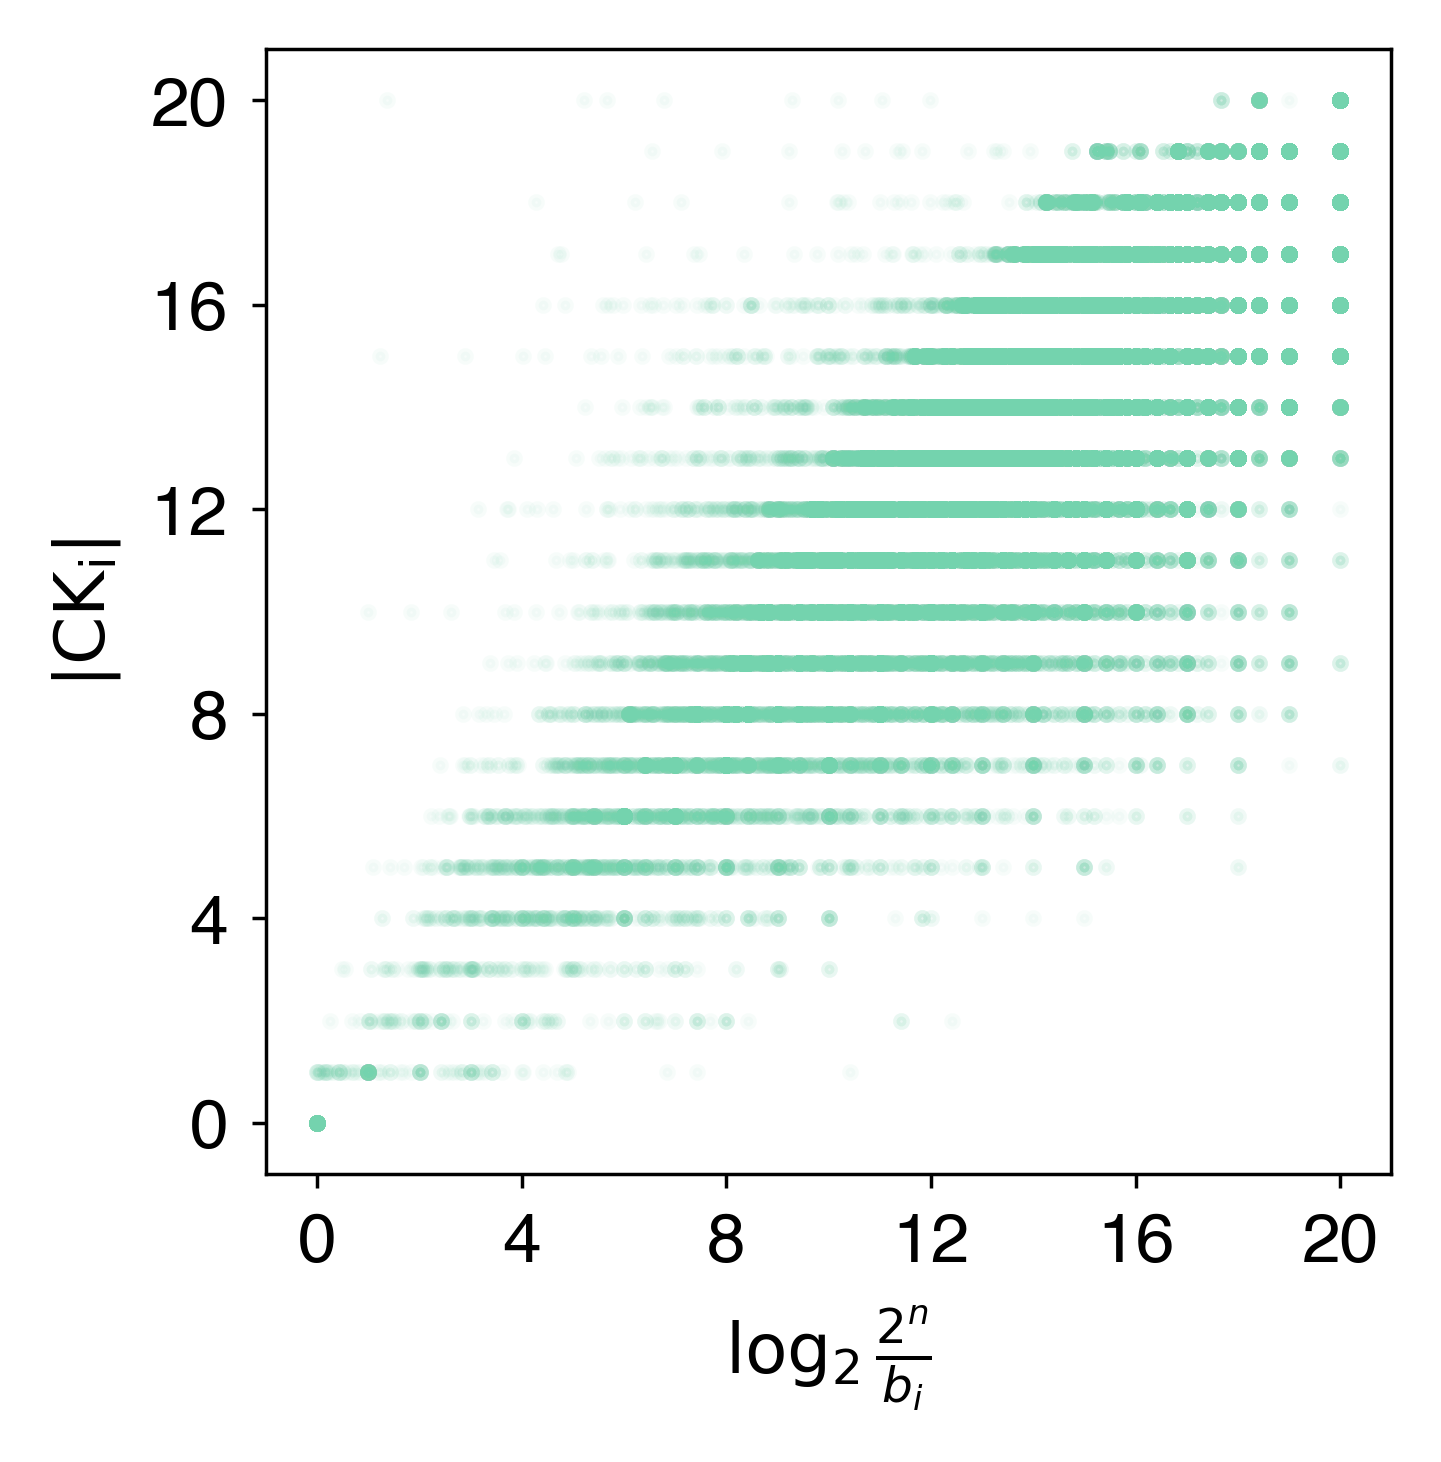

In [26]:
plt.figure(figsize=(3,3),dpi=500)
# plt.hist2d(np.log2(relative_basin_sizes)/net_sizes,
#            relative_ck_sizes,bins=10,cmap=plt.colormaps['RdYlBu']) #,alpha=0.05,s=10)
plt.scatter(-np.log2(relative_basin_sizes),
            absolute_ck_sizes,alpha=0.05,s=2,
            c=colors1['random'])
#plt.xscale('log')
plt.xlabel('$\\log_2{\\frac{2^n}{b_i}}$')
plt.ylabel('$|\mathrm{CK_i}|$')
plt.xticks(range(0,21,4))
plt.yticks(range(0,21,4))
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.2,right=0.95)
makePretty()
plt.savefig('240130_ck_size_vs_relative_basin_size.png')

/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bdaniel6/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


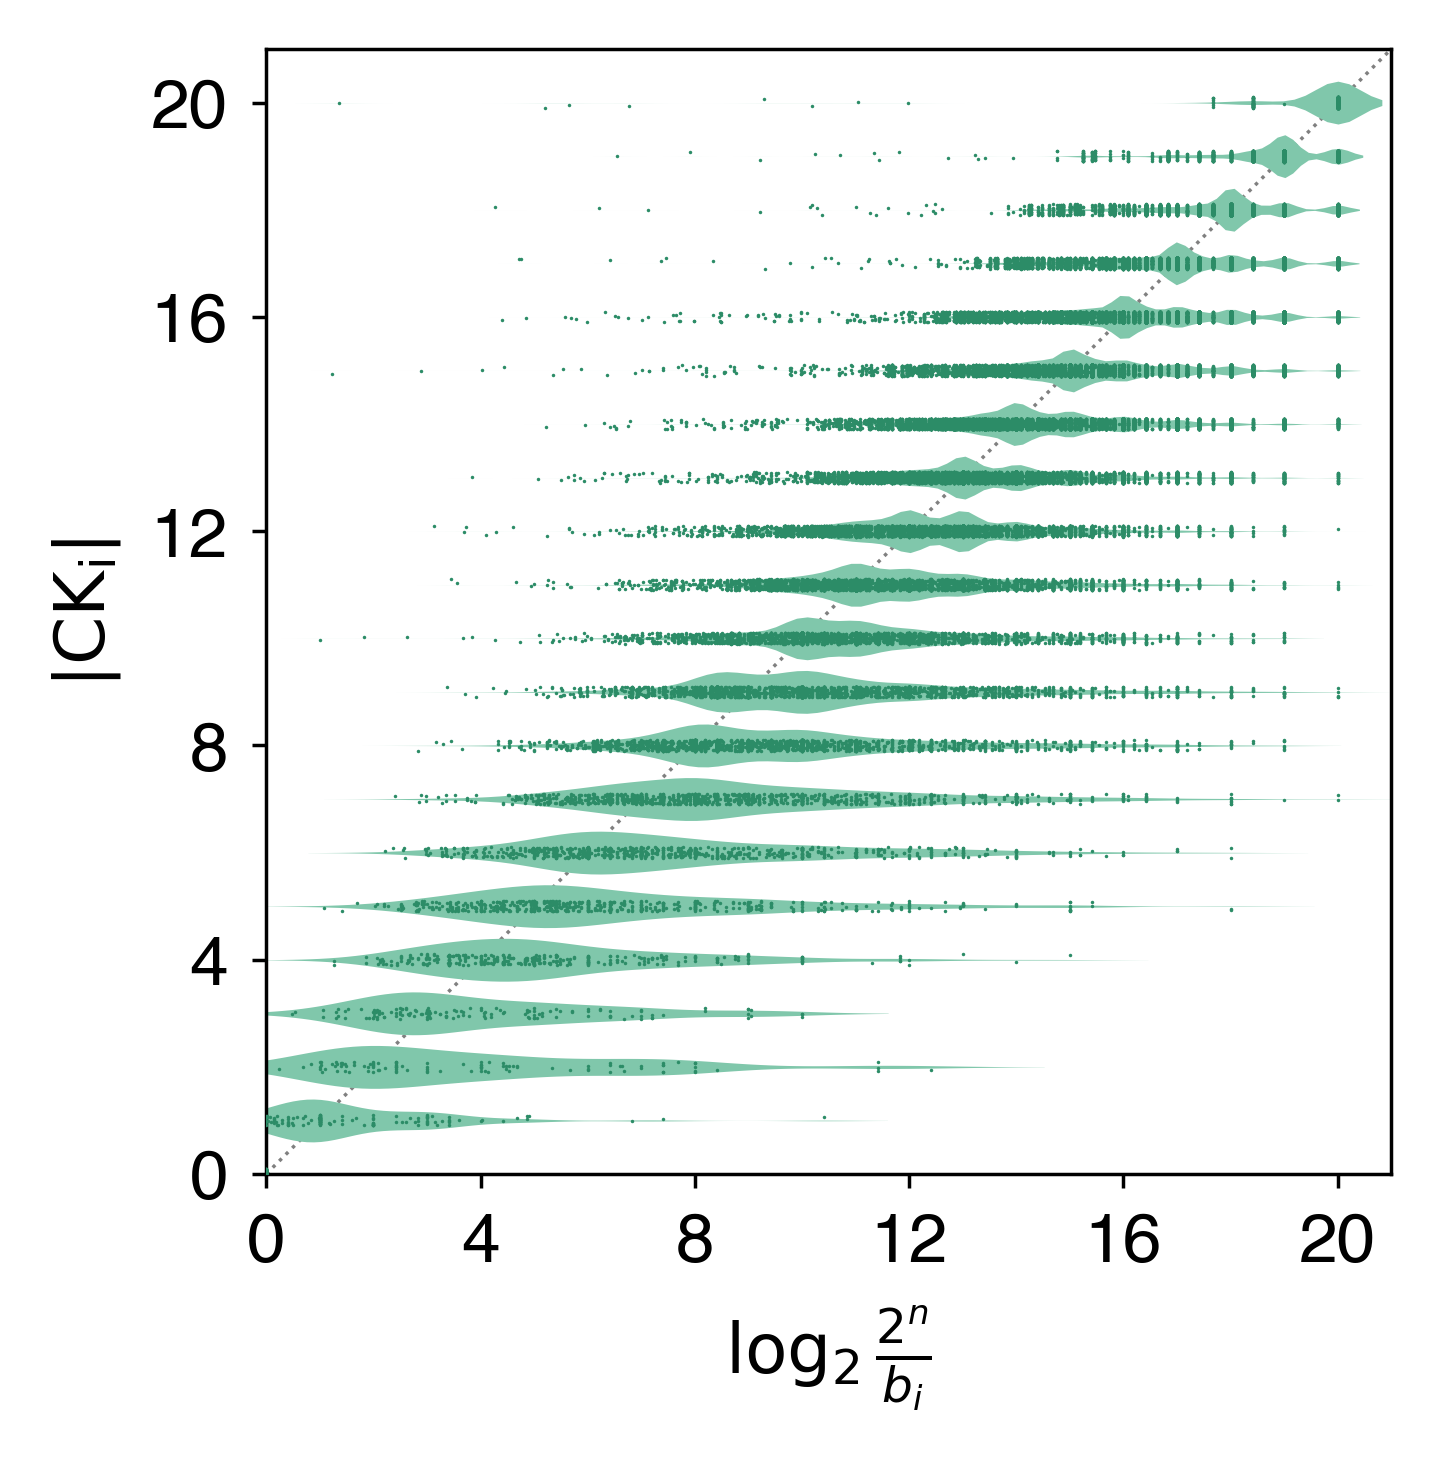

In [48]:
# make corresponding violin plot using seaborn

plotdata = pd.DataFrame(np.transpose([-np.log2(relative_basin_sizes),
                                      absolute_ck_sizes]),
                       columns=['log relative basin size','CK size float'])
plotdata['CK size'] = pd.cut(plotdata['CK size float'],bins=range(-1,21),labels=False).astype('str')
plotdata.sort_values(by='CK size float',inplace=True,ascending=True)

plt.figure(figsize=(3,3),dpi=500)
sb.violinplot(plotdata,
              x='log relative basin size',
              y='CK size',
              linewidth=0.0,
              scale='width', # in newer version of seaborn, this is density_norm='width'
              color=colors1['random']) 
sb.stripplot(plotdata,
              x='log relative basin size',
              y='CK size',
              size=0.5,
              color=colors1['random dark'])
plt.plot([0,21],[0,21],ls=':',lw=0.5,c='gray',zorder=-10)
plt.axis(xmin=0,xmax=21,ymin=0,ymax=21)
plt.xlabel('$\\log_2{\\frac{2^n}{b_i}}$')
plt.ylabel('$|\mathrm{CK_i}|$')
plt.xticks(range(0,21,4))
plt.yticks(range(0,21,4))
plt.subplots_adjust(bottom=0.2,top=0.95,left=0.2,right=0.95)
makePretty()
plt.savefig('240130_ck_size_vs_relative_basin_size_with_violin.png')

Text(0, 0.5, 'Number of maximal cks')

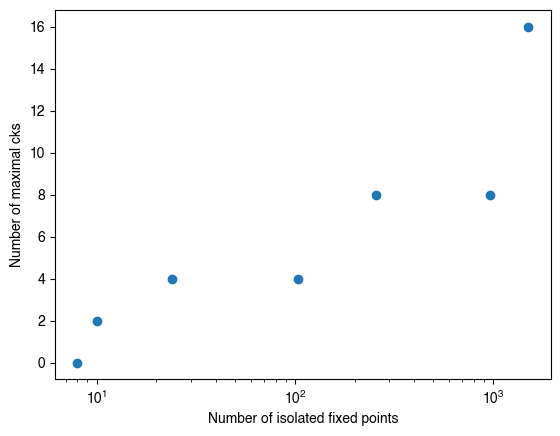

In [19]:
plt.scatter(ck_df['number of isolated fixed points'],
            ck_df['number_of_maximal_cks'])
plt.xscale('log')
plt.xlabel('Number of isolated fixed points')
plt.ylabel('Number of maximal cks')

Text(0, 0.5, 'Number of maximal cks')

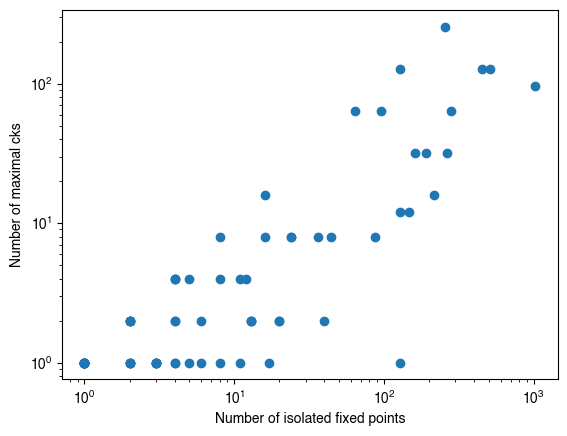

In [20]:
plt.scatter(dfExactRandomAll['number of isolated fixed points'],
            dfExactRandomAll['number_of_maximal_cks'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of isolated fixed points')
plt.ylabel('Number of maximal cks')

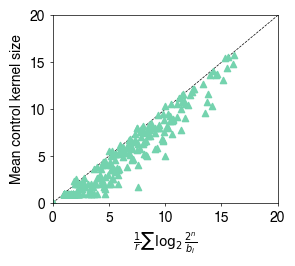

In [24]:
# plot actual ck size versus all-basin approximation for random networks

plt.figure(figsize=figsize)
for ck_func in [predict_ck_all_basins,]:
    plt.scatter(dfExactRandomAll[ck_func.__name__],
                dfExactRandomAll['mean control kernel size'],
                label=ck_func.__name__,
                s=markersize,
                c=colors1['random'],
                marker='^')

#plt.xlabel('$\\frac{r-s}{r} \log_2{r} + \\frac{s}{r} n$')
plt.xlabel('$\\frac{1}{r} \\sum \\log_2 \\frac{2^n}{b_i}$')
plt.ylabel('Mean control kernel size')
plt.plot([minsize,maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
plt.axis(xmin=minsize,xmax=maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
#plt.legend()
makePretty()
plt.savefig('240130_actual_versus_predicted_mean_ck_size_all_basins_random_networks.pdf')

### 2024/1/31 modified controllability that neglects isolated fixed points

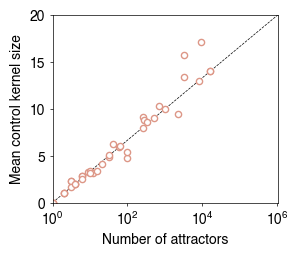

In [28]:
plt.figure(figsize=figsize)
plt.scatter(ck_df['number of attractors'],
            ck_df['mean control kernel size nonisolated'],
            s=markersize,
            label='Actual CK size',
            edgecolors=colors1['cellcollective'],
            c='w')

plt.xlabel('Number of attractors')
plt.ylabel('Mean control kernel size')
plt.xscale('log')
plt.plot([2**minsize,2**maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
#plt.legend()
plt.axis(xmin=2**minsize,xmax=2**maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
makePretty()

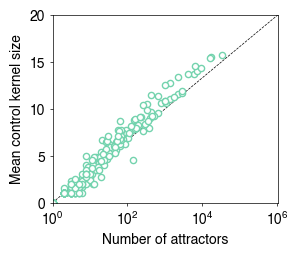

In [29]:
plt.figure(figsize=figsize)
plt.scatter(dfExactRandomAll['number of attractors'],
            dfExactRandomAll['mean control kernel size nonisolated'],
            s=markersize,
            label='Actual CK size',
            edgecolors=colors1['random'],
            c='w')

plt.xlabel('Number of attractors')
plt.ylabel('Mean control kernel size')
plt.xscale('log')
plt.plot([2**minsize,2**maxsize],[minsize,maxsize],'k--',lw=0.5,zorder=-10)
#plt.legend()
plt.axis(xmin=2**minsize,xmax=2**maxsize,ymin=minsize,ymax=maxsize)
plt.yticks([0,5,10,15,20])
plt.subplots_adjust(bottom=bottom,top=top,left=left,right=right)
makePretty()